In [1]:
# import libraries
import warnings
warnings.filterwarnings("ignore")
from nltk import FreqDist
import seaborn as sns
%matplotlib inline
import re
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import requests
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
#from gensim.models import KeyedVectors

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.layers import Embedding
import os
from nltk import TreebankWordTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
nltk.download('stopwords')
stemmer = PorterStemmer()
tw = TreebankWordTokenizer()
import json
from collections import Counter
import itertools


Using TensorFlow backend.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#nltk.download('stopwords')

In [2]:
pd.set_option('max_colwidth', 100)

In [3]:
mt = []
tt = []
abst = []
lt = []
fl = []
pdi = []
rds = 0

In [5]:
#os.getcwd()

'/mnt/disks/user/project'

In [6]:
#stemmer = PorterStemmer()

In [7]:
#tw = TreebankWordTokenizer()

In [8]:
#import json

In [4]:
def input_df(pth):
    mt = []
    tt = []
    abst = []
    lt = []
    fl = []
    pdi = []
    rds = 0
    #import json
    #i = 2
    chec = 0
    path = pth
    #path = '/mnt/disks/user/project/Corona_Kaggle_project/biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
    files = os.listdir(path)
    #print(files)
    #keyword = 'your_keyword'
    for file in files:
        #print(file)
        #print(os.path.isfile(os.path.join(path,file)))
        if os.path.isfile(os.path.join(path,file)):
            with open(os.path.join(path,file)) as f:
                data = json.load(f)
        if chec == 0:
            print(data.keys())
            chec = 1
        fl.append(file)
        title = data['metadata']
        title = title['title']
        title = re.sub(r"\s+", " ", title)
        title = re.sub(r"(\s+\.)", ".", title)
        tt.append(title)
        abtr = data['abstract']
        #print(abtr)
        if abtr != []:
            abtr = abtr[0]
            abtr = abtr['text']
            abtr = re.sub(r"\s+", " ", abtr)
            abtr = re.sub(r"(\s+\.)", ".", abtr)
        else:
            abtr = title
        abst.append(abtr)
        bd = data['body_text']
        pdi.append(data['paper_id'])
        for i in range(len(bd)):
            fd = bd[i]
            str1 = fd['text']
            str1 = re.sub(r"\b(\d\s\d\s\d)\b", "", str1)
            str1 = re.sub(r"\s+", " ", str1)
            str1 = re.sub(r"(\s+\.)", ".", str1)
            if rds == 0:
                rds = 1
            lt.append(str1)
        lt = " ".join(lt)
        f.close()
        mt.append(lt)
        lt = []
    return(pdi, mt, tt, abst)

        
            
            
        

In [75]:
# Trial code
#data['metadata']

{'title': 'Two novel bocaparvovirus species identified in wild Himalayan marmots',
 'authors': [{'first': 'Yuanyun',
   'middle': [],
   'last': 'Ao',
   'suffix': '',
   'affiliation': {'laboratory': '',
    'institution': 'National Institute for Viral Diseases Control and Prevention',
    'location': {'postCode': '100052',
     'settlement': 'Beijing',
     'country': 'China'}},
   'email': ''},
  {'first': '†',
   'middle': [],
   'last': '',
   'suffix': '',
   'affiliation': {},
   'email': ''},
  {'first': 'Xiaoyue',
   'middle': [],
   'last': 'Li',
   'suffix': '',
   'affiliation': {'laboratory': 'Laboratory Department',
    'institution': "the First People's Hospital of Anqing",
    'location': {'postCode': '246000',
     'settlement': 'Anqing',
     'country': 'China'}},
   'email': ''},
  {'first': 'Lili',
   'middle': [],
   'last': 'Li',
   'suffix': '',
   'affiliation': {'laboratory': '',
    'institution': 'National Institute for Viral Diseases Control and Prevention',

In [80]:
#dr = data['metadata']
#dr = dr['title']

In [81]:
#dr

'Two novel bocaparvovirus species identified in wild Himalayan marmots'

It can be seen that "Abstract" from the respective files is a better source for search of the answers as the full body
text section consists of detailed explaination as well as analysis of various experiments that would not be required 
for short and crisp answers for the questions"
Therefore, will consider "Abstract" section only for answer generation. However, will consider mentioning the full "body text" within the dataframe for reference.

In [10]:
#print(data['paper_id'])

1b9fed2824e97db8cb35912549dd2e9cde7b6c18


In [11]:
print(len(pdi))

1342


In [12]:
print(len(mt))

1342


In [13]:
#len(mt[0].split())

1889

In [5]:
pdi, mt, tt, abst = input_df('/mnt/disks/user/project/Corona_Kaggle_project/biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/')

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [6]:
pid = pd.DataFrame(data = {'sha':pdi, 'Body_text':mt, 'fl_title':tt, 'fl_abstract':abst})

In [7]:
pid.head()

,sha,Body_text,fl_title,fl_abstract
0,518b635f78bdc65dc6666380eafc3b7a283b3af7,"To quantify the effects of the most informative risk factors, partial dependences were Table). A...",Tissue Tropism and Transmission Ecology Predict Virulence of Human RNA Viruses 2,Tissue Tropism and Transmission Ecology Predict Virulence of Human RNA Viruses 2
1,4bc43084ccdb8d3bb704ca577473169cd1a64f9c,"belong to the order of Nidovirales, family of Coronaviridae, and subfamily of Orthocoronavirinae...",Risk estimation and prediction by modeling the transmission of the novel coronavirus (COVID-19) ...,"Background: In December 2019, an outbreak of novel coronavirus disease emerged in Wuhan, China a..."
2,e4e5e67fd4f75548dffab7f75484bc14fa15c0c2,"new genes involved in phi6 host range expansion, expanding our knowledge of this important model...",Existing host range mutations constrain further emergence of RNA viruses,"RNA viruses are capable of rapid host shifting, typically due to a point mutation that confers e..."
3,5f7e6772c35ba7d67891202d43e0a43917f90971,Reproduction number is an epidemiologic indicator that reflects the contagiousness and transmiss...,EARLY ESTIMATION OF REPRODUCTION NUMBER OF COVID-19 IN VIETNAM,Reproduction number is an epidemiologic indicator that reflects the contagiousness and transmiss...
4,a625e5d6fc8956c231c500a40e887e248a69de61,The bulk of death cases had comorbidity (76.8%). Respiratory failure remained the leading cause ...,Clinical characteristics of 82 death cases with COVID-19,"A recently developing pneumonia caused by SARS-CoV-2 was originated in Wuhan, China, and has qui..."


In [9]:
len(pid)

1342

In [185]:
print(mt[-1])

Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans. 2019 Novel Coronavirus (2019-nCoV) is a coronavirus identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Coronaviruses are zoonotic, meaning they are transmitted between animals and people. Detailed investigations found that SARS-CoV has been transmitted from civet cats to humans and MERS-CoV from camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. Early on, many of the patients in the outbreak in Wuhan, China reportedly have some link to a large seafood and animal market, suggesting animal-toperson spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. The 2019-nCoV is spreading from person to person in China and l

In [13]:
print(pdi[-1])

1b9fed2824e97db8cb35912549dd2e9cde7b6c18


In [18]:
# Trial code
#fc = data['abstract']
#print(type(fc))
#print(len(fc))
#jc = fc[0]
#print(type(jc))
#print(jc['text'])

<class 'list'>
1
<class 'dict'>
The cutting-edge technology vaccinomics is the combination of two topics immunogenetics and immunogenomics with the knowledge of systems biology and immune profiling for designing vaccine against infectious disease. In our present study, an epitope-based peptide vaccine against nonstructural protein 4 of beta coronavirus, using a combination of B cell and T cell epitope predictions, followed by molecular docking methods are performed. Here, protein sequences of homologous nonstructural protein 4 of beta coronavirus are collected and conserved regions present in them are investigated via phylogenetic study to determine the most immunogenic part of protein. From the identified region of the target protein, the peptide sequence IRNTTNPSAR from the region ranging from 38-47 and the sequence PTDTYTSVYLGKFRG from the positions of 76-90 are considered as the most potential B cell and T cell epitopes respectively. Furthermore, this predicted T cell epitopes PTDT

In [ ]:
# Loading body text from other folders

In [19]:
#Practice code
#mt = []
#tt = []
#abst = []
#lt = []
#fl = []
#pdi = []
#rds = 0
#import json
#i = 2
#chec = 0
#path = '/mnt/disks/user/project/Corona_Kaggle_project/comm_use_subset/comm_use_subset/pdf_json/'
#files = os.listdir(path)
#print(files)
#keyword = 'your_keyword'
#for file in files:
    #print(file)
    #print(os.path.isfile(os.path.join(path,file)))
    #if os.path.isfile(os.path.join(path,file)):
        #print(i)
        #with open(os.path.join(path,file)) as f:
          #data = json.load(f)
    #if chec == 0:
        #print(data.keys())
        #chec = 1
    #print(data)
    #fl.append(file)
    #title = data['metadata']
    #title = title['title']
    #title = re.sub(r"\s+", " ", title)
    #title = re.sub(r"(\s+\.)", ".", title)
    #tt.append(title)
    #print(data['abstract'])
    #abtr = data['abstract']
    #print(abtr)
    #if abtr != []:
        #abtr = abtr[0]
        #abtr = abtr['text']
        #abtr = re.sub(r"\s+", " ", abtr)
        #abtr = re.sub(r"(\s+\.)", ".", abtr)
    #else:
        #abtr = title
    #abst.append(abtr)
    #bd = data['body_text']
    #pdi.append(data['paper_id'])
    #print(bd)
    #for i in range(len(bd)):
        #print(i)
        #print(bd[i])
        #fd = bd[i]
        #print(fd)
        #str1 = fd['text']
        #str1 = re.sub(r"\b(\d\s\d\s\d)\b", "", str1)
        #str1 = re.sub(r"\s+", " ", str1)
        #str1 = re.sub(r"(\s+\.)", ".", str1)
        #if rds == 0:
            #print(str1)
            #rds = 1
        #lt.append(str1)
    #lt = " ".join(lt)
    #f.close()
    #mt.append(lt)
    #print(mt)
    #lt = []

        
            
            
        

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [10]:
pdi, mt, tt, abst = input_df('/mnt/disks/user/project/Corona_Kaggle_project/comm_use_subset/comm_use_subset/pdf_json/')

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [11]:
pid2 = pd.DataFrame(data = {'sha':pdi, 'Body_text':mt, 'fl_title':tt, 'fl_abstract':abst})

In [12]:
pid2.head()

,sha,Body_text,fl_title,fl_abstract
0,fc151568de57c0456578757131c3b49b86286b3c,"To convert a closed double-stranded DNA or RNA helix into two open single strands, so that other...","Inhibition of RNA Helicases of ssRNA + Virus Belonging to Flaviviridae, Coronaviridae and Picorn...",Many viral pathogens encode the motor proteins named RNA helicases which display various functio...
1,15dd9abbe4084c12712f094415c5ca9980aaacda,Pathogens are considered to be one of the driving forces of evolution. The major histocompatibil...,The major histocompatibility complex in Old World camelids and low polymorphism of its class II ...,Background: The Major Histocompatibility Complex (MHC) is a genomic region containing genes with...
2,eabfb15b60476742917f92c6fb60a7bc6ec203aa,"Porcine hemagglutinating encephalomyelitis virus (PHEV) belongs to the order Nidovirales, family...",miR-142-5p Disrupts Neuronal Morphogenesis Underlying Porcine Hemagglutinating Encephalomyelitis...,miR-142-5p Disrupts Neuronal Morphogenesis Underlying Porcine Hemagglutinating Encephalomyelitis...
3,e3785336f334b853b3d269a8301dfc564f5fae74,Streptococcus pyogenes (Group A streptococcus) is a common pathogen responsible for a number of ...,BMC Microbiology Association of the shuffling of Streptococcus pyogenes clones and the fluctuati...,The number of scarlet fever occurrences reported between 2000 and 2006 fluctuated considerably i...
4,9663f9f18256ca7161c2af2ce451911c90f629da,Supplementary Figure 1. The setting up of the dot blot immunoassays for human and mouse samples....,Supplementary Material Decreased levels of foldase and chaperone proteins are associated with an...,Supplementary Material Decreased levels of foldase and chaperone proteins are associated with an...


In [23]:
# Practice code
#mt = []
#tt = []
#abst = []
#lt = []
#fl = []
#pdi = []
#rds = 0
#import json
#i = 2
#chec = 0
#path = '/mnt/disks/user/project/Corona_Kaggle_project/noncomm_use_subset/noncomm_use_subset/pdf_json/'
#files = os.listdir(path)
#print(files)
#keyword = 'your_keyword'
#for file in files:
    #print(file)
    #print(os.path.isfile(os.path.join(path,file)))
    #if os.path.isfile(os.path.join(path,file)):
        #print(i)
        #with open(os.path.join(path,file)) as f:
          #data = json.load(f)
    #if chec == 0:
        #print(data.keys())
        #chec = 1
    #print(data)
    #fl.append(file)
    #title = data['metadata']
    #title = title['title']
    #title = re.sub(r"\s+", " ", title)
    #title = re.sub(r"(\s+\.)", ".", title)
    #tt.append(title)
    #print(data['abstract'])
    #abtr = data['abstract']
    #print(abtr)
    #if abtr != []:
        #abtr = abtr[0]
        #abtr = abtr['text']
        #abtr = re.sub(r"\s+", " ", abtr)
        #abtr = re.sub(r"(\s+\.)", ".", abtr)
    #else:
        #abtr = title
    #abst.append(abtr)
    #bd = data['body_text']
    #pdi.append(data['paper_id'])
    #print(bd)
    #for i in range(len(bd)):
        #print(i)
        #print(bd[i])
        #fd = bd[i]
        #print(fd)
        #str1 = fd['text']
        #str1 = re.sub(r"\b(\d\s\d\s\d)\b", "", str1)
        #str1 = re.sub(r"\s+", " ", str1)
        #str1 = re.sub(r"(\s+\.)", ".", str1)
        #if rds == 0:
            #print(str1)
            #rds = 1
        #lt.append(str1)
    #lt = " ".join(lt)
    #f.close()
    #mt.append(lt)
    #print(mt)
    #lt = []

        
            
            
        

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])
individuals at a higher risk of transmitting WFB communicable diseases as they may have come from areas where the population is living in a high-density, poor, social environment.


In [13]:
pdi, mt, tt, abst = input_df('/mnt/disks/user/project/Corona_Kaggle_project/noncomm_use_subset/noncomm_use_subset/pdf_json/')

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [14]:
pid3 = pd.DataFrame(data = {'sha':pdi, 'Body_text':mt, 'fl_title':tt, 'fl_abstract':abst})

In [15]:
pid3.head()

,sha,Body_text,fl_title,fl_abstract
0,e35295b96d9cee71829be853fe2a43accd1dff37,individuals at a higher risk of transmitting WFB communicable diseases as they may have come fro...,Enemy at the Gate Osong Public Health and Research Perspectives,Enemy at the Gate Osong Public Health and Research Perspectives
1,75251cc3d312b0d2c63117458c68dba563715155,Nosocomial transmission of respiratory viruses (RVs) can lead to unanticipated complications for...,Prevention of respiratory outbreaks in the rehabilitation setting,Background Respiratory viral (RV) outbreaks in rehabilitation facilities can jeopardise patient ...
2,041adbe00a7ca71fcbc38ff4406297ce86e93a6a,Influenza or flu is an acute disease of the respiratory system and is present worldwide. The ant...,A DESCRIPTIVE STUDY OF PANDEMIC INFLUENZA A(H1N1)PDM09,Influenza A viruses undergo frequent antigenic mutations and may thus cause seasonal epidemics a...
3,a60e292d31e4bb27e20f3ace17fc295ad60990c8,"I n 2014, 1.1 billion travelers crossed international borders. 1 A 2012 report outlined that 18%...",Pre-Travel Medical Preparation of Business and Occupational Travelers,"were analyzed. Results: Of 23,534 travelers, 61% were non-occupational and 39% occupational. Bus..."
4,1dc5516776928be0a80cf9c69d19d7ee641dafeb,Korea has designated notifying infectious diseases and controlled infectious diseases since 1954...,Epidemic Intelligence Service Officers and Field Epidemiology Training Program in Korea,Korea has adopted Epidemic Intelligence Service (EIS) officers through the Field Epidemiology Tr...


In [28]:
# Practice code
#mt = []
#tt = []
#abst = []
#lt = []
#fl = []
#pdi = []
#rds = 0
#import json
#i = 2
#chec = 0
#path = '/mnt/disks/user/project/Corona_Kaggle_project/custom_license/custom_license/pdf_json/'
#files = os.listdir(path)
#print(files)
#keyword = 'your_keyword'
#for file in files:
    #print(file)
    #print(os.path.isfile(os.path.join(path,file)))
    #if os.path.isfile(os.path.join(path,file)):
        #print(i)
        #with open(os.path.join(path,file)) as f:
          #data = json.load(f)
    #if chec == 0:
        #print(data.keys())
        #chec = 1
    #print(data)
    #fl.append(file)
    #title = data['metadata']
    #title = title['title']
    #title = re.sub(r"\s+", " ", title)
    #title = re.sub(r"(\s+\.)", ".", title)
    #tt.append(title)
    #print(data['abstract'])
    #abtr = data['abstract']
    #print(abtr)
    #if abtr != []:
        #abtr = abtr[0]
        #abtr = abtr['text']
        #abtr = re.sub(r"\s+", " ", abtr)
        #abtr = re.sub(r"(\s+\.)", ".", abtr)
    #else:
        #abtr = title
    #abst.append(abtr)
    #bd = data['body_text']
    #pdi.append(data['paper_id'])
    #print(bd)
    #for i in range(len(bd)):
        #print(i)
        #print(bd[i])
        #fd = bd[i]
        #print(fd)
        #str1 = fd['text']
        #str1 = re.sub(r"\b(\d\s\d\s\d)\b", "", str1)
        #str1 = re.sub(r"\s+", " ", str1)
        #str1 = re.sub(r"(\s+\.)", ".", str1)
        #if rds == 0:
            #print(str1)
            #rds = 1
        #lt.append(str1)
    #lt = " ".join(lt)
    #f.close()
    #mt.append(lt)
    #print(mt)
    #lt = []

        
            
            
        

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [16]:
pdi, mt, tt, abst = input_df('/mnt/disks/user/project/Corona_Kaggle_project/custom_license/custom_license/pdf_json/')

dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [17]:
pid4 = pd.DataFrame(data = {'sha':pdi, 'Body_text':mt, 'fl_title':tt, 'fl_abstract':abst})

In [18]:
pid4.head()

,sha,Body_text,fl_title,fl_abstract
0,c646e655066d0982c151b516ebdf0334d037ffcf,"Coronaviruses (CoV) are able to infect humans, birds and many animal species [68]. In humans, co...",Middle East respiratory syndrome coronavirus (MERS-CoV): evidence and speculations,"In 2012, a novel human coronavirus emerged and was tentatively named ''Middle East respiratory s..."
1,4d77c1be3e298496537c5d106afeb77655b9ca13,"The vast majority of infectious diseases in all species are initiated by colonization of, or ent...",Challenges in mucosal vaccination of cattle,Challenges in mucosal vaccination of cattle
2,586cc97876444b5ebac56140971f4ce8ed3007d5,"This is a PDF file of an article that has undergone enhancements after acceptance, such as the a...",,
3,8b43b0a17be0dd0140d0b4145591c9e8f080f92e,Pseudoknots are known to be involved in protein expression and especially in the modulation of t...,Pseudoknot and translational control in the expression of the S15 ribosomal protein S15 I pseudo...,Translational autocontrol of the expression of the ribosomal protein S15 proceeds through the tr...
4,f5a95ba3b592c46903d5f4a4c00bd15a2cbb74f9,Influenza causes seasonal infections worldwide that can lead to complications and deaths in ever...,"Influenza vaccines and vaccinations in Poland -past, present and future","Influenza vaccines and vaccinations in Poland -past, present and future"


In [19]:
pid =  pd.concat([pid, pid2, pid3, pid4], ignore_index=True)

In [20]:
pid.head()

,sha,Body_text,fl_title,fl_abstract
0,518b635f78bdc65dc6666380eafc3b7a283b3af7,"To quantify the effects of the most informative risk factors, partial dependences were Table). A...",Tissue Tropism and Transmission Ecology Predict Virulence of Human RNA Viruses 2,Tissue Tropism and Transmission Ecology Predict Virulence of Human RNA Viruses 2
1,4bc43084ccdb8d3bb704ca577473169cd1a64f9c,"belong to the order of Nidovirales, family of Coronaviridae, and subfamily of Orthocoronavirinae...",Risk estimation and prediction by modeling the transmission of the novel coronavirus (COVID-19) ...,"Background: In December 2019, an outbreak of novel coronavirus disease emerged in Wuhan, China a..."
2,e4e5e67fd4f75548dffab7f75484bc14fa15c0c2,"new genes involved in phi6 host range expansion, expanding our knowledge of this important model...",Existing host range mutations constrain further emergence of RNA viruses,"RNA viruses are capable of rapid host shifting, typically due to a point mutation that confers e..."
3,5f7e6772c35ba7d67891202d43e0a43917f90971,Reproduction number is an epidemiologic indicator that reflects the contagiousness and transmiss...,EARLY ESTIMATION OF REPRODUCTION NUMBER OF COVID-19 IN VIETNAM,Reproduction number is an epidemiologic indicator that reflects the contagiousness and transmiss...
4,a625e5d6fc8956c231c500a40e887e248a69de61,The bulk of death cases had comorbidity (76.8%). Respiratory failure remained the leading cause ...,Clinical characteristics of 82 death cases with COVID-19,"A recently developing pneumonia caused by SARS-CoV-2 was originated in Wuhan, China, and has qui..."


In [22]:
pid.tail()

,sha,Body_text,fl_title,fl_abstract
36231,cc50f83beb4dae7f0a60291c3e1d4868d0884c5a,LAMP will be useful not only for the detection of infected plants but also quarantine. The react...,The Plant Pathology Journal Development of a Rapid Detection Method for Potato virus X by Revers...,"The primary step for efficient control of viral diseases is the development of simple, rapid, an..."
36232,6217c77be15bba46ecbc3568159ff0dabf484043,"Coronaviruses (CoVs) are enveloped, single-stranded, positive sense RNA viruses that can be divi...",Susceptibility of porcine IPI-2I intestinal epithelial cells to infection with swine enteric cor...,Swine enteric coronavirus (CoV) is an important group of pathogens causing diarrhea in piglets. ...
36233,f50072cb0c2b1dfd3fa5b8badcf53fa41ece25b8,Microbial molecular markers and epidemiological surveillance in the era of high throughput seque...,,"publicly funded repositories, such as the WHO COVID database with rights for unrestricted resear..."
36234,e7fa9d575a7d7acaa850e2062f17ef30b3293704,"geographical framework, has the analytical power to help answer these questions. When the diseas...",,
36235,4b802901270fa1f6865899ec8b02066f37c176c8,"Recently, many severe, emerging infectious diseases have occurred in humans after the respective...",Two novel bocaparvovirus species identified in wild Himalayan marmots,Bocaparvovirus (BOV) is a genetically diverse group of DNA viruses and a possible cause of respi...


In [21]:
len(pid)

36236

In [22]:
len(pid["sha"].unique())

36236

In [24]:
pid['fl_abstract'].isnull().sum()

0

In [25]:
pid['fl_title'].isnull().sum()

0

In [23]:
len(pid['fl_abstract'])

36236

In [ ]:
# We can see that there are no null 'abstract' values extracted straight from
# the pdf files. Therefore, will consider 'abstract' from this source and
# merge it within the working dataframe 

Loading the metadata csv file into a dataframe. This will be the master dataframe consisting of key parameters such as 'Abstract', 'body_text', 'title', 'paper_id', etc being considered for this project 

In [24]:
path2 = '/mnt/disks/user/project/Corona_Kaggle_project'

In [25]:
metdat = pd.read_csv(path2 + '/' + 'metadata.csv')

In [26]:
metdat.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,8q5ondtn,NaN,Elsevier,Intrauterine virus infections and congenital heart disease,10.1016/0002-8703(72)90077-4,NaN,4361535.0,els-covid,Abstract The etiologic basis for the vast majority of cases of congenital heart disease remains ...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(72)90077-4
1,pzfd0e50,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850.0,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan; Plavoşin, Livia; Herzog, Georgeta",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(80)90355-5
2,22bka3gi,NaN,Elsevier,Cigarette smoking and coronary heart disease: new evidence and old reactions,10.1016/0002-8703(80)90356-7,NaN,7355701.0,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-8703(80)90356-7
3,zp9k1k3z,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann, Mary K.; Sturgill, Benjamin A.; Davis, John S.",The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/0002-9343(73)90176-9
4,cjuzul89,NaN,Elsevier,"Epidemiology of community-acquired respiratory tract infections in adults Incidence, etiology, a...",10.1016/0002-9343(85)90361-4,NaN,4014285.0,els-covid,Abstract Upper respiratory tract infections are the most common types of infectious diseases amo...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,False,custom_license,https://doi.org/10.1016/0002-9343(85)90361-4


In [27]:
metdat = metdat.loc[metdat["has_pdf_parse"] == True, :]

In [28]:
len(metdat)

34283

In [28]:
metdat["full_text_file"].value_counts()

custom_license        21979
comm_use_subset        8917
noncomm_use_subset     2045
biorxiv_medrxiv        1342
Name: full_text_file, dtype: int64

In [29]:
len(pid2)

9365

In [30]:
len(pid3)

2377

In [58]:
len(pid4)

23152

Seems there are few research papers missing in the meta data file. I will focus on the papers 
mentioned in the meta file only as it still consists of information on sizeable number of
number of documents

In [25]:
# Considering files only in folder "biorxiv_medrxiv"
#metdat = metdat.loc[metdat["full_text_file"] == "biorxiv_medrxiv", :]

In [36]:
metdat.head(3)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
3,zp9k1k3z,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,10.1016/0002-9343(73)90176-9,NaN,4579077.0,els-covid,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann, Mary K.; Sturgill, Benjamin A.; Davis, John S.",The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/0002-9343(73)90176-9
5,wwf90zxt,212e990b378e8d267042753d5f9d4a64ea5e9869,Elsevier,Infectious diarrhea: Pathogenesis and risk factors,10.1016/0002-9343(85)90367-5,NaN,2861742.0,els-covid,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has...",1985-06-28,"Cantey, J.Robert",The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/0002-9343(85)90367-5
6,dlh93ax6,bf5d344243153d58be692ceb26f52c08e2bd2d2f,Elsevier,New perspectives on the pathogenesis of rheumatoid arthritis,10.1016/0002-9343(88)90356-7,NaN,3052052.0,els-covid,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a...",1988-10-14,"Zvaifler, Nathan J.",The American Journal of Medicine,NaN,NaN,True,False,custom_license,https://doi.org/10.1016/0002-9343(88)90356-7


In [31]:
len(metdat)

34283

In [32]:
metdat['abstract'].isnull().sum()

4126

In [39]:
metdat['sha'].isnull().sum()

0

In [40]:
metdat['title'].isnull().sum()

36

In [33]:
metdat.loc[metdat['abstract'].isnull() == True, 'full_text_file'].value_counts()

custom_license        3729
comm_use_subset        241
noncomm_use_subset     155
biorxiv_medrxiv          1
Name: full_text_file, dtype: int64

We can see that there are number of 'abstracts' and even 'title' values are missing in the
main meta file. Will get these values from the files but will restrict to the files 
that are mentioned in meta data file

In [34]:
# Extracting only the dataframe fields that are of importance
metdatfn = metdat[['sha','title','abstract']]

In [62]:
metdatfn.head(1)

,sha,title,abstract
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),..."


In [35]:
metdatfn.index = pd.RangeIndex(0, len(metdatfn.index))

In [64]:
metdatfn.head(3)

,sha,title,abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),..."
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has..."
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a..."


In [36]:
print(len(metdatfn))

34283


In [37]:
print(len(pid))

36236


In [38]:
# Merging the Dataframes, metdatfn and pid to get the final dataframe 
# with features required for model learning
metdatfn = pd.merge(metdatfn, pid, how = 'inner', on = 'sha')

In [68]:
metdatfn.head(3)

,sha,title,abstract,Body_text,fl_title,fl_abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...","The patient (Fo, ) was a 58 year old mentally retarded white woman, born in a rural area of sout...",Clinical and Immunologic Studies in Identical Twins Discordant for Systemic Lupus Erythematosus,"Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE), were eva..."
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has...","Pathogenesis and Risk Factors J. ROBERT CANTEY, M.D. Charleston, South Carolina Our understandin...",Infectious Diarrhea Pathogenesis and Risk Factors,Infectious Diarrhea Pathogenesis and Risk Factors
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a...","In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with an incitin...",,


In [39]:
print(len(metdatfn))

32425


In [40]:
metdatfn['abstract'].isnull().sum()

4040

In [38]:
metdatfn['title'].isnull().sum()

36

In [42]:
metdatfn['fl_title'].isnull().sum()

0

In [54]:
metdatfn['fl_abstract'].isnull().sum()

0

In [55]:
metdatfn.tail()

,sha,title,abstract,Body_text,fl_title,fl_abstract
32420,014ce88b18095a1eaa877ab5aae818df6ec214f6,Viral load of SARS-CoV-2 in clinical samples,NaN,", days 4-7 (R²=0·93, p<0·001) , and days 7-14 (R²=0·95, p=0·028). From 17 confirmed cases of SAR...",Correspondence,Correspondence
32421,df42da6659fa90742caa430143fa8fae6fe7da3e,Standard and AEGIS nicking molecular beacons detect amplicons from the Middle East respiratory s...,"Abstract This paper combines two advances to detect MERS-CoV, the causative agent of Middle East...","The coronavirus that causes Middle East respiratory syndrome (MERS-CoV) is highly contagious, ca...",Standard and AEGIS nicking molecular beacons detect amplicons from the Middle East respiratory s...,"This paper combines two advances to detect MERS-CoV, the causative agent of Middle East Respirat..."
32422,f186e5f78bd1203264270110fd788805756715a5,The psychiatric impact of the novel coronavirus outbreak,NaN,Letter to the Editor Patients with confirmed or suspected 2019-nCoV (new coronavirus disease) ma...,,
32423,0a603b52939b7dab816c56ffc774c1ddda67a484,Advising the traveller,"Abstract Global travel continues to increase, particularly to tropical destinations that have di...","International travel continues to increase, with >1 billion travellers worldwide now crossing in...",Advising the traveller,"Global travel continues to increase, particularly to tropical destinations that have different h..."
32424,a92e70c0a129a56173ef38bf186c1cd7ecfe6d9f,Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,"Abstract Feline and canine coronaviruses (FCoV and CCoV, respectively) are common pathogens of c...",Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,"Feline and canine coronaviruses (FCoV and CCoV, respectively) are common pathogens of cats and d..."


In [ ]:
# We can see that few 'title' values from meta file are missing as well
# abstract values from meta file are missing.
# Will copy the missing values from respective 'fl_title' and 'fl_abstract'
# values extracted from files


In [41]:
metdatfn.loc[metdatfn['abstract'].isnull() == True, 'abstract'] = metdatfn.loc[metdatfn['abstract'].isnull() == True, 'fl_abstract'] 

In [40]:
metdatfn['abstract'].isnull().sum()

0

In [42]:
metdatfn.loc[metdatfn['abstract'] == '', 'abstract']

24        
25        
34        
43        
56        
        ..
32309     
32324     
32351     
32365     
32422     
Name: abstract, Length: 1446, dtype: object

In [42]:
metdatfn.loc[32351, 'abstract']

''

In [43]:
metdatfn.loc[metdatfn['abstract'] == '', 'abstract'].count()

1446

In [44]:
# There still seems to be missing values for 'abstract' values even after
# copying from the 'fl_abstract'. Will now see if we can consider 'title'
# values for the same
metdatfn.loc[metdatfn['abstract'] == '', 'abstract'] = metdatfn.loc[metdatfn['abstract'] == '', 'title']

In [45]:
metdatfn.loc[metdatfn['abstract'] == '', 'abstract'].count()

0

In [46]:
metdatfn.loc[metdatfn['abstract'].isnull() == True, 'abstract'].count()

0

In [ ]:
# There are no null or '' values of abstract now

In [46]:
metdatfn.loc[metdatfn['title'].isnull() == True, 'title'] = metdatfn.loc[metdatfn['title'].isnull() == True, 'fl_title'] 

In [47]:
metdatfn['title'].isnull().sum()

0

In [47]:
metdatfn.loc[metdatfn['title'] == '', 'title'].count()

30

In [53]:
metdatfn['sha'].isnull().sum()

0

In [ ]:
# We now can have a dataframe of files with no null or missing 'abstract'
# values. There are few files with missing 'title' values but since answers
# are to be extracted from 'abstract', we can still consider such files

In [46]:
# Trial code
#tr = list(metdat.loc[metdat['sha']== '1b9fed2824e97db8cb35912549dd2e9cde7b6c18', 'abstract'])
#print(type(tr))
#print(tr)

<class 'list'>
['ABSTRACTThe cutting-edge technology vaccinomics is the combination of two topics immunogenetics and immunogenomics with the knowledge of systems biology and immune profiling for designing vaccine against infectious disease. In our present study, an epitope-based peptide vaccine against nonstructural protein 4 of beta coronavirus, using a combination of B cell and T cell epitope predictions, followed by molecular docking methods are performed. Here, protein sequences of homologous nonstructural protein 4 of beta coronavirus are collected and conserved regions present in them are investigated via phylogenetic study to determine the most immunogenic part of protein. From the identified region of the target protein, the peptide sequence IRNTTNPSAR from the region ranging from 38-47 and the sequence PTDTYTSVYLGKFRG from the positions of 76-90 are considered as the most potential B cell and T cell epitopes respectively. Furthermore, this predicted T cell epitopes PTDTYTSVY a

In [49]:
metdatfn.head()

,sha,title,abstract,Body_text,fl_title,fl_abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...","The patient (Fo, ) was a 58 year old mentally retarded white woman, born in a rural area of sout...",Clinical and Immunologic Studies in Identical Twins Discordant for Systemic Lupus Erythematosus,"Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE), were eva..."
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has...","Pathogenesis and Risk Factors J. ROBERT CANTEY, M.D. Charleston, South Carolina Our understandin...",Infectious Diarrhea Pathogenesis and Risk Factors,Infectious Diarrhea Pathogenesis and Risk Factors
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a...","In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with an incitin...",,
3,ddd2ecf42ec86ad66072962081e1ce4594431f9c,Management of acute and chronic respiratory tract infections,"Abstract Pharyngitis, bronchitis, and pneumonia represent the most common respiratory tract infe...","Respiratory Tract Infections JERROLD J. ELLNER, M.D. Cleveland, CM Pharyngitis, bronchitis, and ...",,
4,a55cb4e724091ced46b5e55b982a14525eea1c7e,Acute bronchitis: Results of U.S. and European trials of antibiotic therapy,"Abstract Acute bronchitis, an illness frequently encountered by primary-care physicians, is an i...","A cute bronchitis, an illness frequently encountered by primary-care physicians [1] , is an infl...",Acute Bronchitis: Results of U.S. and European Trials of Antibiotic Therapy,"Acute bronchitis, an illness frequently encountered by primary-care physicians, is an inflammati..."


In [48]:
len(metdatfn)

32425

In [82]:
metdatfn.tail()

,sha,title,abstract,Body_text,fl_title,fl_abstract
32420,014ce88b18095a1eaa877ab5aae818df6ec214f6,Viral load of SARS-CoV-2 in clinical samples,Correspondence,", days 4-7 (R²=0·93, p<0·001) , and days 7-14 (R²=0·95, p=0·028). From 17 confirmed cases of SAR...",Correspondence,Correspondence
32421,df42da6659fa90742caa430143fa8fae6fe7da3e,Standard and AEGIS nicking molecular beacons detect amplicons from the Middle East respiratory s...,"Abstract This paper combines two advances to detect MERS-CoV, the causative agent of Middle East...","The coronavirus that causes Middle East respiratory syndrome (MERS-CoV) is highly contagious, ca...",Standard and AEGIS nicking molecular beacons detect amplicons from the Middle East respiratory s...,"This paper combines two advances to detect MERS-CoV, the causative agent of Middle East Respirat..."
32422,f186e5f78bd1203264270110fd788805756715a5,The psychiatric impact of the novel coronavirus outbreak,The psychiatric impact of the novel coronavirus outbreak,Letter to the Editor Patients with confirmed or suspected 2019-nCoV (new coronavirus disease) ma...,,
32423,0a603b52939b7dab816c56ffc774c1ddda67a484,Advising the traveller,"Abstract Global travel continues to increase, particularly to tropical destinations that have di...","International travel continues to increase, with >1 billion travellers worldwide now crossing in...",Advising the traveller,"Global travel continues to increase, particularly to tropical destinations that have different h..."
32424,a92e70c0a129a56173ef38bf186c1cd7ecfe6d9f,Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,"Abstract Feline and canine coronaviruses (FCoV and CCoV, respectively) are common pathogens of c...",Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,Infection of cats with atypical feline coronaviruses harbouring a truncated form of the canine t...,"Feline and canine coronaviruses (FCoV and CCoV, respectively) are common pathogens of cats and d..."


In [49]:
metdatfn = metdatfn[['sha','title', 'abstract']]

In [50]:
metdatfn.head()

,sha,title,abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),..."
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has..."
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a..."
3,ddd2ecf42ec86ad66072962081e1ce4594431f9c,Management of acute and chronic respiratory tract infections,"Abstract Pharyngitis, bronchitis, and pneumonia represent the most common respiratory tract infe..."
4,a55cb4e724091ced46b5e55b982a14525eea1c7e,Acute bronchitis: Results of U.S. and European trials of antibiotic therapy,"Abstract Acute bronchitis, an illness frequently encountered by primary-care physicians, is an i..."


In [50]:
metdatfn['abstract'].isnull().sum()

2

In [51]:
metdatfn.loc[metdatfn['abstract'].isnull() == True, 'title']

7128     
12686    
Name: title, dtype: object

In [76]:
metdatfn.loc[7128, 'title']

''

In [77]:
metdatfn.loc[12686, 'title']

''

In [78]:
metdatfn['title'].isnull().sum()

0

In [86]:
metdatfn.loc[metdatfn['abstract'] == '', 'abstract'].count()

0

In [ ]:
# Two 'abstract' rows still exist with '' values. Will remove these rows

In [52]:
metdatfn = metdatfn[~pd.isnull(metdatfn['abstract'])]

In [53]:
metdatfn['abstract'].isnull().sum()

0

In [54]:
metdatfn.index = pd.RangeIndex(0, len(metdatfn.index))

In [55]:
metdatfn.head()

,sha,title,abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),..."
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has..."
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a..."
3,ddd2ecf42ec86ad66072962081e1ce4594431f9c,Management of acute and chronic respiratory tract infections,"Abstract Pharyngitis, bronchitis, and pneumonia represent the most common respiratory tract infe..."
4,a55cb4e724091ced46b5e55b982a14525eea1c7e,Acute bronchitis: Results of U.S. and European trials of antibiotic therapy,"Abstract Acute bronchitis, an illness frequently encountered by primary-care physicians, is an i..."


In [56]:
len(metdatfn)

32423

In [57]:
for i in range(len(metdatfn)):
    metdatfn.loc[i, "abs_length"] = int(len(metdatfn.loc[i, "abstract"]))

In [58]:
metdatfn['abs_length'].value_counts()

7.0       100
302.0      71
27.0       50
39.0       50
37.0       49
         ... 
5329.0      1
3064.0      1
3914.0      1
2644.0      1
3286.0      1
Name: abs_length, Length: 3003, dtype: int64

In [94]:
metdatfn.loc[metdatfn['abs_length'] < 500, 'abs_length'].value_counts()

7.0      100
302.0     71
27.0      50
39.0      50
37.0      49
        ... 
2.0        1
172.0      1
216.0      1
168.0      1
483.0      1
Name: abs_length, Length: 488, dtype: int64

In [59]:
len(metdatfn[metdatfn['abs_length'] < 500])

4978

In [60]:
len(metdatfn[metdatfn['abs_length'] > 500])

27440

In [66]:
# Extracting total words (except stop words and irrelevant characters such as paranthesis)
comb_abs = (".").join(metdatfn["abstract"])
abs_words = conv_word(comb_abs)


In [67]:
# Function to plot the frequency of words
def plot_word_frequency(words, xlab, ylab, top_n=10):
    plt.figure(figsize=(12,10))
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plot = sns.barplot(counts, labels)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.legend(loc = 'Best')
    return plot

W1122 20:52:11.760568 140627866560320 legend.py:1289] No handles with labels found to put in legend.


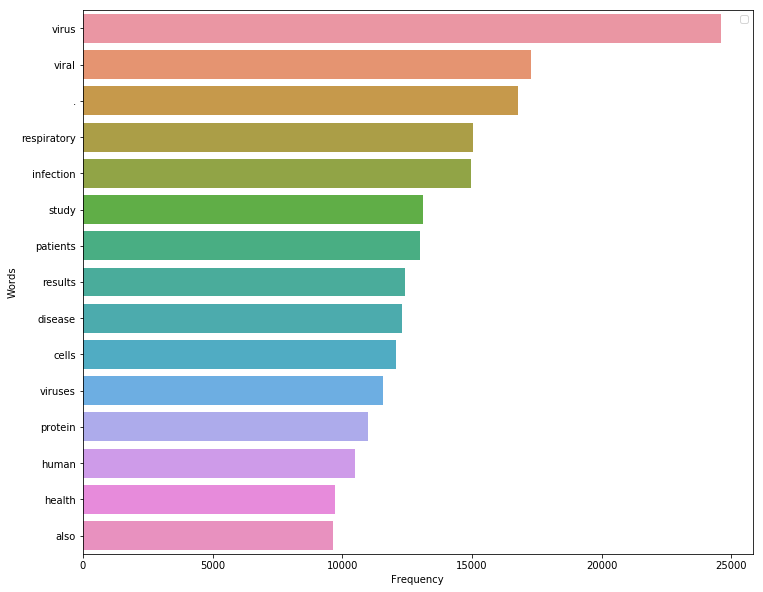

In [140]:
plot_word_frequency(abs_words, 'Frequency', 'Words', 15)

The top 15 words mentioned in the complete abstract dataset are shown above along with their frequencies.
The word 'virus' was most common used word while other more commonly used words included words like 'viral', 'respiratory', 'infection', 'disease', etc 

W1122 20:12:33.395789 140627866560320 legend.py:1289] No handles with labels found to put in legend.


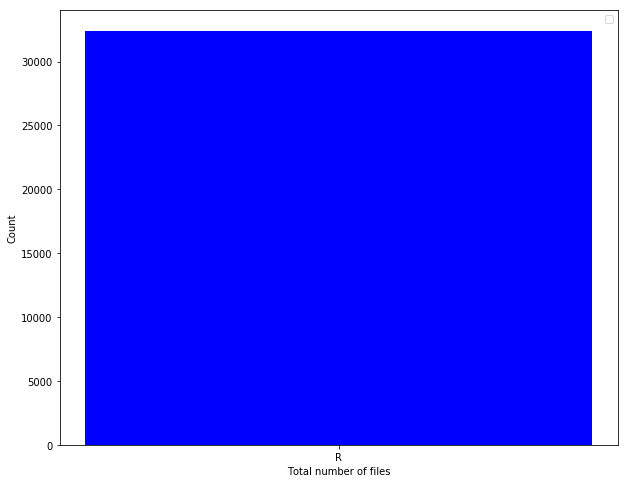

In [116]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(1), len(metdatfn["sha"].index), color = 'blue')
plt.xticks(np.arange(1), "Records")
plt.xlabel('Total number of files')
plt.ylabel('Count')
plt.legend(loc = 'Best')
plt.show()

W1122 21:22:14.752402 140627866560320 legend.py:1289] No handles with labels found to put in legend.


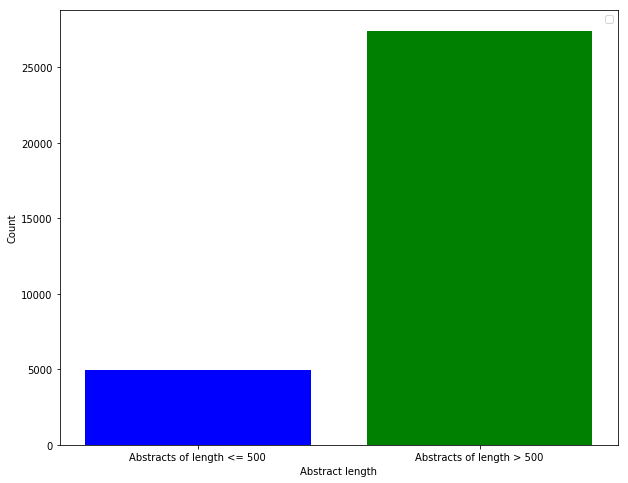

In [143]:
plt.figure(figsize=(10,8))
ticks = ['Abstracts of length <= 500', 'Abstracts of length > 500']
plt.bar(np.arange(2), [len(metdatfn[metdatfn['abs_length'] <= 500].index), len(metdatfn[metdatfn['abs_length'] > 500].index)], color = ['blue', 'green'])
plt.xticks(np.arange(2), ticks)
plt.xlabel('Abstract length')
plt.ylabel('Count')
plt.legend(loc = 'Best')
plt.show()

It can be seen that majority of abstracts are of length greater than 500 words. 

In [77]:
abs_words.index('animal')

174

In [80]:
abs_words[170:175]

['virulence', 'genes', 'additional', 'host-specific', 'animal']

In [81]:
word_freq = FreqDist(abs_words)

In [84]:
word_freq['animal']

2605

The word 'animal' does occur in the abstracts based context being considered for answering the questions. This means that 

In [68]:
# Loading tasks, Questions and respective reference ansewrs into a dataframe
qa_dt = pd.read_csv(path2 + '/' + 'Q_A_Sheet.csv', encoding='cp1252')


In [69]:
qa_dt.head(1)

,Task,Questions,Reference Answers
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?",Respiratory infections can be transmitted through droplets of different sizes: when the droplet ...


In [65]:
# Extracting total words in questions (except stop words and irrelevant characters such as paranthesis)
comb_qt = (".").join(qa_dt["Questions"])
qt_words = conv_word(comb_qt)


W1122 20:54:19.982895 140627866560320 legend.py:1289] No handles with labels found to put in legend.


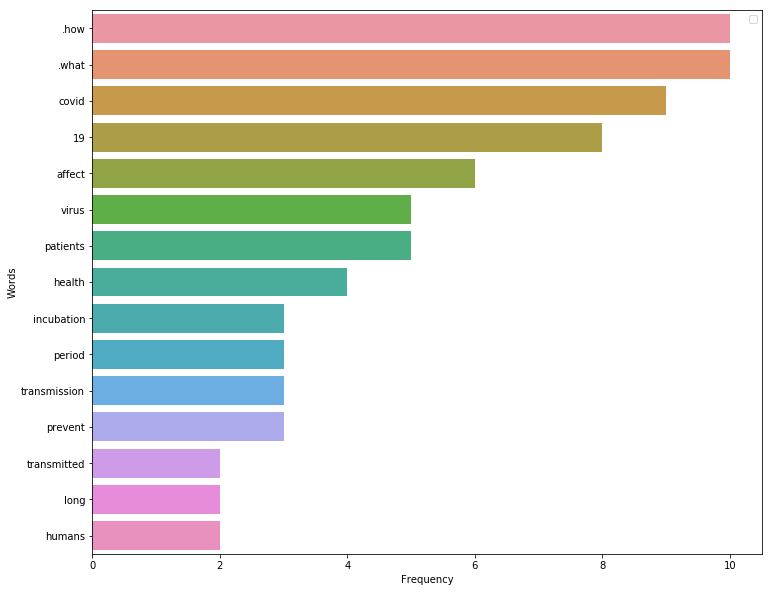

In [142]:
plot_word_frequency(qt_words, 'Frequency', 'Words', 15)

W1122 20:33:31.038264 140627866560320 legend.py:1289] No handles with labels found to put in legend.


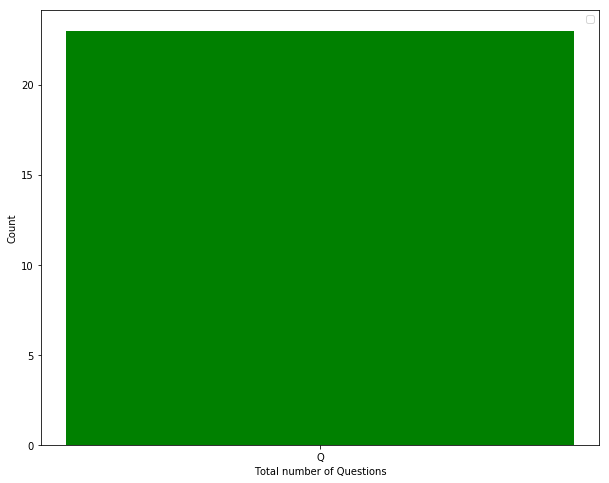

In [121]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(1), len(qa_dt["Questions"].index), color = 'green')
plt.xticks(np.arange(1), "Questions")
plt.xlabel('Total number of Questions')
plt.ylabel('Count')
plt.legend(loc = 'Best')
plt.show()

Some of the most common used words in questions (except stop words and irrelevant characters such as paranthesis) include 'how', 'what', 'covid 19', 'affect', 'virus', 'patients' and 'health'

# Practice cells to derive correct regular expression

In [ ]:
#trp = "ft-rg@ https://ftrt//trail\. http://gtdp love Debi when will u meet. 4.34 https://doi.org/10.1101/2020.03.30.016485"

In [ ]:
#pattern1 = "[^(\w.)]|(^https.+\w$)|(https.+\w$)|(^http.+\w$)|(http.+\w$)"

In [ ]:
#pattern = "[^\w\-\d+.\d+]|https://[\w.]+(([/\w.]+)+)|http://[\w.]+(([/\w.]+)+)"

In [ ]:
#tgh = re.sub(pattern, " ", trp)

In [ ]:
#tgh

In [ ]:
#trp

In [ ]:
#trp = [word for word in trp if word not in stopwords.words("english")]

In [ ]:
#trp = " ".join(trp)

In [ ]:
#trp

# 1. Preprocess data for the TM-IDF stage

## Text tokenization, stemming Function

In [63]:
# define a function to clean text data
def clean_document(document, char_filter = r"[^\w\-\d+.\d+]|https://[\w.]+(([/\w.]+)+)|http://[\w.]+(([/\w.]+)+)"):
    '''
    input:
    document          :  string
    char_filter       :  regex pattern - removes those characters from the text that match the pattern

    output: clean document
    '''
    
    # convert words to lower case
    document = document.lower()
    
    # remove unwanted characters
    document = re.sub(char_filter, " ", document)

    # replace multiple whitespaces with single whitespace
    document = re.sub(r"\s+", " ", document)

    # tokenise words
    words = tw.tokenize(document)
   
   # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # stem
    words = [stemmer.stem(word) for word in words]
    
    # strip whitespace from all words
    words = [word.strip() for word in words]

    # join back words to get document
    document = " ".join(words)

    # strip whitespace from document
    document = document.strip()

    return document



In [64]:
# define a function to data processing for word2vec model 
def conv_word(document, char_filter = r"[^\w\-\d+.\d+]|https://[\w.]+(([/\w.]+)+)|http://[\w.]+(([/\w.]+)+)"):
    '''
    input:
    document          :  string
    char_filter       :  regex pattern - removes those characters from the text that match the pattern

    output: clean document
    '''
    
    # convert words to lower case
    document = document.lower()
    
    # remove unwanted characters
    document = re.sub(char_filter, " ", document)

    # replace multiple whitespaces with single whitespace
    document = re.sub(r"\s+", " ", document)

    # tokenise words
    words = tw.tokenize(document)
   
   # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # strip whitespace from all words
    words = [word.strip() for word in words]

    return words



In [65]:
# define a function to clean text data
def abs_proc(document, char_filter = r"[^\w\-\d+.\d+]|https://[\w.]+(([/\w.]+)+)|http://[\w.]+(([/\w.]+)+)"):
    '''
    input:
    document          :  string
    char_filter       :  regex pattern - removes those characters from the text that match the pattern

    output: clean document
    '''
    
    # convert words to lower case
    document = document.lower()
    
    # remove unwanted characters
    document = re.sub(char_filter, " ", document)

    # replace multiple whitespaces with single whitespace
    document = re.sub(r"\s+", " ", document)

    # tokenise words
    words = tw.tokenize(document)
   
   # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    
    # strip whitespace from all words
    words = [word.strip() for word in words]

    # join back words to get document
    document = "".join(words)

    # strip whitespace from document
    document = document.strip()

    return document



In [70]:
for j in range(len(metdatfn)):
    metdatfn.loc[j, "prp_abstract"] = clean_document(metdatfn.loc[j, "abstract"])

In [71]:
metdatfn.head(1)

,sha,title,abstract,abs_length,prp_abstract
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...",882.0,abstract middle-ag femal ident twin one system lupu erythematosu sle evalu immunolog reactiv pre...


In [72]:
len(metdatfn)

32423

In [73]:
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(metdatfn["prp_abstract"])
print(tfidf_model)  

  (0, 59453)	0.06178815103603215
  (0, 72506)	0.0456444753708397
  (0, 49029)	0.038176873316604985
  (0, 75223)	0.06684242331476671
  (0, 34416)	0.05443754863907482
  (0, 18473)	0.05492178230452705
  (0, 26109)	0.10494184236646456
  (0, 56229)	0.04735615250893744
  (0, 40770)	0.10364533089264773
  (0, 25211)	0.03604460174348514
  (0, 39634)	0.10995544093820316
  (0, 24503)	0.07594684283246646
  (0, 33570)	0.058356695975782906
  (0, 17235)	0.11137560857562122
  (0, 79530)	0.14067163819034598
  (0, 74943)	0.15933841050014022
  (0, 74946)	0.15933841050014022
  (0, 20759)	0.051184569467835304
  (0, 10577)	0.1429685576508497
  (0, 38801)	0.04061434882658179
  (0, 78421)	0.10657640913013258
  (0, 82771)	0.035003032075520545
  (0, 72613)	0.10373250380698869
  (0, 83805)	0.04386013825314429
  (0, 67734)	0.04031538374009984
  :	:
  (32422, 21168)	0.0329194507150667
  (32422, 41733)	0.02883655517983825
  (32422, 74859)	0.16928104318643494
  (32422, 67594)	0.028251639121313055
  (32422, 22132)	0.

In [74]:
tfidf_model.shape

(32423, 85873)

In [ ]:
# Functions for Preprocessing queries and then using TD-IDF to score documents 
#relevance with respect to queries

In [75]:
qa_dt.head()

,Task,Questions,Reference Answers
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?",Respiratory infections can be transmitted through droplets of different sizes: when the droplet ...
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,An incubation period is the time between when you contract a virus and when your symptoms start....
2,"What is known about transmission, incubation, and environmental stability?",How does the incubation period in humans vary across age and health conditions?,The COVID-19 pandemic has shown a markedly low proportion of cases among children. Age dispariti...
3,"What is known about transmission, incubation, and environmental stability?",Can the virus be transmitted asymptomatically or during the incubation period?,The new coronavirus can be transmitted by people who are infected but before their symptoms appe...
4,"What is known about transmission, incubation, and environmental stability?","How does weather, heat, and humidity affect the transmission of COVID 19?",The main findings as per one of the studies related to effects of environemnt on COVID 19 are: H...


In [76]:
for j in range(len(qa_dt)):
    qa_dt.loc[j, "prp_qa"] = clean_document(qa_dt.loc[j, "Questions"])

In [77]:
qa_dt.head()

,Task,Questions,Reference Answers,prp_qa
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?",Respiratory infections can be transmitted through droplets of different sizes: when the droplet ...,covid viru transmit aerosol droplet food close contact faecal matter water
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,An incubation period is the time between when you contract a virus and when your symptoms start....,long incub period viru human
2,"What is known about transmission, incubation, and environmental stability?",How does the incubation period in humans vary across age and health conditions?,The COVID-19 pandemic has shown a markedly low proportion of cases among children. Age dispariti...,incub period human vari across age health condit
3,"What is known about transmission, incubation, and environmental stability?",Can the virus be transmitted asymptomatically or during the incubation period?,The new coronavirus can be transmitted by people who are infected but before their symptoms appe...,viru transmit asymptomat incub period
4,"What is known about transmission, incubation, and environmental stability?","How does weather, heat, and humidity affect the transmission of COVID 19?",The main findings as per one of the studies related to effects of environemnt on COVID 19 are: H...,weather heat humid affect transmiss covid 19


In [78]:
def doc_ranker(query, context_TDIDF, vectorizer, metdatfn):
    tfd_qr = vectorizer.transform([query])
    cos_sim = cosine_similarity(context_TDIDF,tfd_qr)
    metdatfn["TD_IDF_sim_score"] = cos_sim
    return(metdatfn)

In [75]:
# Test code
print(qa_dt.loc[0, "prp_qa"])

covid viru transmit aerosol droplet food close contact faecal matter water


In [79]:
qa_dt.loc[qa_dt["Questions"]== "Can animals transmit COVID 19?", :]

,Task,Questions,Reference Answers,prp_qa
18,"What do we know about virus genetics, origin, and evolution?",Can animals transmit COVID 19?,"Based on the limited available information, the risk of animals spreading the COVID-19 virus to ...",anim transmit covid 19


In [115]:
# Practice code
#metdatfn = doc_ranker(qa_dt.loc[0, "prp_qa"], tfidf_model, vectorizer, metdatfn)

In [ ]:
#print(cos_sim.flatten())

In [ ]:
#len(cos_sim)

In [ ]:
#cos_sim.shape

In [116]:
# Practice code
#metdatfn["TD_IDF_sim_score"].tail()

32418    0.000000
32419    0.003022
32420    0.000000
32421    0.025699
32422    0.047249
Name: TD_IDF_sim_score, dtype: float64

In [117]:
# Practice code
#metdatfn.head()

,sha,title,abstract,prp_abstract,TD_IDF_sim_score
0,aecbc613ebdab36753235197ffb4f35734b5ca63,Clinical and immunologic studies in identical twins discordant for systemic lupus erythematosus,"Abstract Middle-aged female identical twins, one of whom had systemic lupus erythematosus (SLE),...",abstract middle-ag femal ident twin one system lupu erythematosu sle evalu immunolog reactiv pre...,0.000000
1,212e990b378e8d267042753d5f9d4a64ea5e9869,Infectious diarrhea: Pathogenesis and risk factors,"Abstract Our understanding of the pathogenesis of infectious, especially bacterial, diarrhea has...",abstract understand pathogenesi infecti especi bacteri diarrhea increas dramatically. new etiolo...,0.015729
2,bf5d344243153d58be692ceb26f52c08e2bd2d2f,New perspectives on the pathogenesis of rheumatoid arthritis,"Abstract In the pathogenesis of rheumatoid arthritis, locally produced antibodies complex with a...",abstract pathogenesi rheumatoid arthriti local produc antibodi complex incit antigen yet identif...,0.000000
3,ddd2ecf42ec86ad66072962081e1ce4594431f9c,Management of acute and chronic respiratory tract infections,"Abstract Pharyngitis, bronchitis, and pneumonia represent the most common respiratory tract infe...",abstract pharyng bronchiti pneumonia repres common respiratori tract infections. view establish ...,0.000000
4,a55cb4e724091ced46b5e55b982a14525eea1c7e,Acute bronchitis: Results of U.S. and European trials of antibiotic therapy,"Abstract Acute bronchitis, an illness frequently encountered by primary-care physicians, is an i...",abstract acut bronchiti ill frequent encount primary-car physician inflamm tracheobronchi tree r...,0.000000


In [80]:
# Function to generate dataframe with top 10 abstracts from documents relative to given query
# Calculated similarity score between the processed query and abstract by taking cosine product
# between respective TD-IDF vectors  
# Sorting and then considering info of top 10 documents only
def td_idf_cos(qadt, tfidf_model, vectorizer, metdatfn):
    metdatfn = doc_ranker(qadt, tfidf_model, vectorizer, metdatfn)
    metdatfn_srt = metdatfn.sort_values(by = 'TD_IDF_sim_score', ascending = False)
    mtdatfntop = metdatfn_srt.head(10)
    mtdatfntop.index = pd.RangeIndex(0, len(mtdatfntop.index))
    return(mtdatfntop)
#metdatfn_srt.head()

In [81]:
def wrd2vec_cos(word2vec_md, qa_dt_v2):
    vs_set = []
    for i in range(len(qa_dt_v2)):
        sent1 = abs_proc(qa_dt_v2.loc[i, "Model_Sum_Answer"])
        sent2 = abs_proc(qa_dt_v2.loc[i, "Sum_Reference_answers"])
        for answer in [sent1, sent2]:
            vs = np.zeros(300)
            for word in answer:
                vs = np.add(vs, word2vec_md.wv[word]) 
            vs_set.append(vs)
            #print(len(vs_set))
        cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))[0][0]
        #print(cost)
        qa_dt_v2.loc[i, "similarity_score"] = cost
        vs_set = []
    return qa_dt_v2

In [82]:
#metdatfntop_tr = td_idf_cos(qa_dt.loc[18, "prp_qa"], tfidf_model, vectorizer, metdatfn)

In [86]:
#metdatfntop_tr

,sha,title,abstract,prp_abstract,TD_IDF_sim_score
0,045bff414afcee22d7f2f6667cae10b10ba99571,Comprehensive analysis for diagnosis of novel coronavirus disease (COVID-19) infection,COVID-19) infection,covid-19 infect,0.646951
1,17de15d04f7a7643550666d2f0da773f5b7dc95c,COVID-19 Therapeutic and Prevention,COVID-19 Therapeutic and Prevention,covid-19 therapeut prevent,0.512276
2,6fcf4019b0be24071210f97eda4baba53a6a79de,Clinical and pathological characteristics of 2019 novel coronavirus disease (COVID-19): a system...,"Importance: In 2002-2003, a severe pulmonary infectious disease occurred in Guangdong, China. Th...",import 2002-2003 sever pulmonari infecti diseas occur guangdong china. diseas caus sars-cov 17 y...,0.487696
3,f17c6ac4986aecba2dc22f67b32f2d16b369117b,Transmission and epidemiological characteristics of Severe Acute Respiratory Syndrome Coronaviru...,Objectives: Latest epidemic data of Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2)...,object latest epidem data sever acut respiratori syndrom coronaviru 2 sars-cov-2 infect pneumoni...,0.460194
4,0eee9760aee0ca2fdf8d1d215c3689d5f8d84df5,Prevalence and clinical features of 2019 novel coronavirus disease (COVID-19) in the Fever Clini...,"Background With the spread of COVID-19 from Wuhan, Hubei Province to other areas of the country,...",background spread covid-19 wuhan hubei provinc area countri medic staff fever clinic face challe...,0.451951
5,a282fc6ac1a87980e363dfb9a09793d519cacbd5,Parenting in a time of COVID-19,Parenting in a time of COVID-19,parent time covid-19,0.451002
6,ca9be3e297299069e973493982e0c93fa9e4e2ee,COVID-19: what is next for public health?,COVID-19: what is next for public health?,covid-19 next public health,0.440614
7,ff54e074416d584681566019cdec2d3683ac2fc5,Coronavirus Disease 2019 (COVID-19) Pneumonia in a Hemodialysis Patient,Coronavirus disease 2019 (COVID-19) is a highly infective disease caused by the severe acute res...,coronaviru diseas 2019 covid-19 highli infect diseas caus sever acut respiratori syndrom coronav...,0.427497
8,0e154f30a23e2d11bc5674354f3f7c74fb6a0008,On the assessment of more reliable COVID-19 infected number: the italian case.,COVID-19 (SARS-CoV-2) is the most recent pandemic disease the world is currently managing. It st...,covid-19 sars-cov-2 recent pandem diseas world current managing. start china end 2019 diffus thr...,0.420030
9,6f07f5dc2599b774baffd5a80e0b0a59662b7f35,Initiation of a new infection control system for the COVID-19 outbreak,Initiation of a new infection control system for the COVID-19 outbreak,initi new infect control system covid-19 outbreak,0.417856


In [87]:
#metdatfntop_tr.to_excel("test.xlsx")

In [176]:
#print(qa_dt.loc[0, "Questions"])

Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?


In [278]:
#metdatfntop_tr

,sha,title,abstract,prp_abstract,TD_IDF_sim_score
0,30fb77bb67dd41ee831fc9ed1cffc80e5c41761b,Chapter 9 Safety of Water Used in Food Production,Abstract Water has a major and fundamental role in safety of food production. It is a critical r...,abstract water major fundament role safeti food production. critic resourc food industri wide us...,0.375564
1,da4fb62d8f1829d3957949dfb18dc0b6d1d223ff,Factors involved in the aerosol transmission of infection and control of ventilation in healthca...,Summary The epidemics of severe acute respiratory syndrome (SARS) in 2003 highlighted both short...,summari epidem sever acut respiratori syndrom sar 2003 highlight short- long-rang transmiss rout...,0.346695
2,f26952fcfc1863fcb5ae1d05f0e072ffa597f9b0,Severe Acute Respiratory Syndrome (SARS) and the GDP. Part II: Implications for GDPs,"The transmission modes of SARS-coronavirus appear to be through droplet spread, close contact an...",transmiss mode sars-coronaviru appear droplet spread close contact fomit although air born trans...,0.320411
3,11ad2acc16067afbf2ce40d422647c3d899ecbd4,Cough aerosol in healthy participants: fundamental knowledge to optimize droplet-spread infectio...,"BACKGROUND: The Influenza A H1N1 virus can be transmitted via direct, indirect, and airborne rou...",background influenza h1n1 viru transmit via direct indirect airborn rout non-infect subject infe...,0.310106
4,04e8b80ed7a2ffd701f7fa9079698fe01c94f278,Documentary Research of Human Respiratory Droplet Characteristics,Abstract Respiratory droplet characteristics are key to determine the droplet-borne pathogen tra...,abstract respiratori droplet characterist key determin droplet-born pathogen transmiss provid sc...,0.299934
5,709e51c08788944db48106970f38cebe2b5bd596,Role of viral bioaerosols in nosocomial infections and measures for prevention and control,Abstract The presence of patients with diverse pathologies in hospitals results in an environmen...,abstract presenc patient divers patholog hospit result environ rich variou microorgan includ res...,0.293366
6,dc845f9fdcd05760f704f4250fae42c9f29773b0,Chapter 4 Viral Diseases Transmissible by Kissing,"Abstract Viral infections can be transmitted by various routes. At one extreme, airborne or drop...",abstract viral infect transmit variou routes. one extrem airborn droplet viral infect e.g. varic...,0.285603
7,c3cb6dbc8f9856954962672e54253ab8fe627446,Possible SARS Coronavirus Transmission during Cardiopulmonary Resuscitation,Infection of healthcare workers with the severe acute respiratory syndrome–associated coronaviru...,infect healthcar worker sever acut respiratori syndrom associ coronaviru sars-cov thought occur ...,0.280251
8,327bc5f754f40be82f7abcd9b95b3ff62a620394,Exceptional matters,Exceptional matters,except matter,0.271126
9,6f192000b0e87fe2c55632441655de31c61596c4,Bacterial survival in evaporating deposited droplets on a teflon-coated surface,Understanding of bacterial survival in aerosols is crucial for controlling infection transmissio...,understand bacteri surviv aerosol crucial control infect transmiss via airborn aerosol larg drop...,0.265386


In [119]:
# Practice code
#metdatfntop = metdatfn_srt.head(10)

In [120]:
# Practice code
#len(metdatfntop)

10

In [121]:
# Practice code
#metdatfntop.index = pd.RangeIndex(0, len(metdatfntop.index))

In [122]:
# Practice code
#metdatfntop.head(3)

,sha,title,abstract,prp_abstract,TD_IDF_sim_score
0,30fb77bb67dd41ee831fc9ed1cffc80e5c41761b,Chapter 9 Safety of Water Used in Food Production,Abstract Water has a major and fundamental role in safety of food production. It is a critical r...,abstract water major fundament role safeti food production. critic resourc food industri wide us...,0.375564
1,da4fb62d8f1829d3957949dfb18dc0b6d1d223ff,Factors involved in the aerosol transmission of infection and control of ventilation in healthca...,Summary The epidemics of severe acute respiratory syndrome (SARS) in 2003 highlighted both short...,summari epidem sever acut respiratori syndrom sar 2003 highlight short- long-rang transmiss rout...,0.346695
2,f26952fcfc1863fcb5ae1d05f0e072ffa597f9b0,Severe Acute Respiratory Syndrome (SARS) and the GDP. Part II: Implications for GDPs,"The transmission modes of SARS-coronavirus appear to be through droplet spread, close contact an...",transmiss mode sars-coronaviru appear droplet spread close contact fomit although air born trans...,0.320411


# Download of BERT and dependencies

In [124]:
#!pip install transformers==3.3.1




    100% |████████████████████████████████| 1.1MB 8.4MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/72/e0/57edbab017a204e9f39448c1717292437a45b5f7cf3a9dbf4a9c026b03c5/sentencepiece-0.1.94.tar.gz
    100% |████████████████████████████████| 3.0MB 8.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/fc/c9/f58220ac44a1592f79a343caba12f6837f9e0c04c196176a3d66338e1ea8/joblib-0.17.0-py3-none-any.whl
  Complete output from command /mnt/disks/user/anaconda3/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-install-h16zuvy9/sentencepiece/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/pip-wheel-0n2dqqm2 --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/sentencepiece
  copying src/sentencepiece/__init__.py -> 

In [82]:
import torch
from transformers import BertTokenizer
from transformers import BertForQuestionAnswering

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'

BERT_SQUAD = 'bert-large-uncased-whole-word-masking-finetuned-squad'

model = BertForQuestionAnswering.from_pretrained(BERT_SQUAD)
tokenizer = BertTokenizer.from_pretrained(BERT_SQUAD)

model = model.to(torch_device)
model.eval()

print()

I1125 12:14:31.162966 140212937652032 filelock.py:274] Lock 140210150718040 acquired on /root/.cache/torch/transformers/00bf8b18639562831ff9d22825e646f00f34a6976c6ed0ed1c4b35d334bb7a51.b772b6b6a8558acff388e409ffb931bf7aa1c06b8bf788f0e0b64a548908ae4f.lock


I1125 12:14:31.957112 140212937652032 filelock.py:318] Lock 140210150718040 released on /root/.cache/torch/transformers/00bf8b18639562831ff9d22825e646f00f34a6976c6ed0ed1c4b35d334bb7a51.b772b6b6a8558acff388e409ffb931bf7aa1c06b8bf788f0e0b64a548908ae4f.lock


I1125 12:14:32.311906 140212937652032 filelock.py:274] Lock 140210148756784 acquired on /root/.cache/torch/transformers/951442347f8499682d264a4ca7b8ef1169963526e761ec58de8328f4f57f5249.2db7ae79c41a184c87600faabafa1369db2b16457723fd154ca3b436c4172807.lock


I1125 12:14:55.694745 140212937652032 filelock.py:318] Lock 140210148756784 released on /root/.cache/torch/transformers/951442347f8499682d264a4ca7b8ef1169963526e761ec58de8328f4f57f5249.2db7ae79c41a184c87600faabafa1369db2b16457723fd154ca3b436c4172807.lock


I1125 12:15:10.893942 140212937652032 filelock.py:274] Lock 140210153325176 acquired on /root/.cache/torch/transformers/425869b134694b14f3fd06adbee0d84e62abc76097792a5c6f94524239e0e8b4.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


I1125 12:15:12.234672 140212937652032 filelock.py:318] Lock 140210153325176 released on /root/.cache/torch/transformers/425869b134694b14f3fd06adbee0d84e62abc76097792a5c6f94524239e0e8b4.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


In [11]:
# Summary generator model initiation
#from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
#bart_model = 'facebook/bart-large-cnn'
#sum_tokenizer = BartTokenizer.from_pretrained(bart_model)
#sum_model = BartForConditionalGeneration.from_pretrained(bart_model)
#sum_model.to(torch_device)
#sum_model.eval()

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): LearnedPositionalEmbedding(1026, 1024, padding_idx=1)
      (layers): ModuleList(
        (0): EncoderLayer(
          (self_attn): Attention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm(torch.Size([1024]), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): LayerNorm(torch.Size([1024]), eps=1e-05, ele

In [83]:
from summarizer import Summarizer
sum_model = Summarizer()


I1125 12:15:45.646034 140212937652032 filelock.py:274] Lock 140209794959792 acquired on /root/.cache/torch/transformers/6dfaed860471b03ab5b9acb6153bea82b6632fb9bbe514d3fff050fe1319ee6d.788fed32bb8481a9b15ce726d41c53d5d5066b04c667e34ce3a7a3826d1573d8.lock


I1125 12:15:46.476850 140212937652032 filelock.py:318] Lock 140209794959792 released on /root/.cache/torch/transformers/6dfaed860471b03ab5b9acb6153bea82b6632fb9bbe514d3fff050fe1319ee6d.788fed32bb8481a9b15ce726d41c53d5d5066b04c667e34ce3a7a3826d1573d8.lock


I1125 12:15:46.762005 140212937652032 filelock.py:274] Lock 140209794969216 acquired on /root/.cache/torch/transformers/73e65a4648c1a5eab31ecea94e04a92a7168cd7089d588b68e5bc057aff40421.4d5343a4b979c4beeaadef17a0453d1bb183dd9b084f58b84c7cc781df343ae6.lock


I1125 12:17:55.242703 140212937652032 filelock.py:318] Lock 140209794969216 released on /root/.cache/torch/transformers/73e65a4648c1a5eab31ecea94e04a92a7168cd7089d588b68e5bc057aff40421.4d5343a4b979c4beeaadef17a0453d1bb183dd9b084f58b84c7cc781df343ae6.lock


I1125 12:18:07.261841 140212937652032 filelock.py:274] Lock 140210153356256 acquired on /root/.cache/torch/transformers/9b3c03a36e83b13d5ba95ac965c9f9074a99e14340c523ab405703179e79fc46.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


I1125 12:18:08.586525 140212937652032 filelock.py:318] Lock 140210153356256 released on /root/.cache/torch/transformers/9b3c03a36e83b13d5ba95ac965c9f9074a99e14340c523ab405703179e79fc46.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084.lock


In [84]:
# Reconstructing or cleaning token answers received from BERTSQUAD pretrained model by removing 
# '##' and extra whitespaces 
def cleanText(tokens, start=0, stop=-1):
    tokens = tokens[start: stop]
    if '[SEP]' in tokens:
        sepind = tokens.index('[SEP]')
        tokens = tokens[sepind+1:]
    txt = ' '.join(tokens)
    txt = txt.replace(' ##', '')
    txt = txt.replace('##', '')
    txt = txt.strip()
    txt = " ".join(txt.split())
    txt = txt.replace(' .', '.')
    txt = txt.replace('( ', '(')
    txt = txt.replace(' )', ')')
    txt = txt.replace(' - ', '-')
    txt_list = txt.split(' , ')
    txt = ''
    nTxtL = len(txt_list)
    if nTxtL == 1:
        return txt_list[0]
    newList =[]
    for i,t in enumerate(txt_list):
        if i < nTxtL -1:
            if t[-1].isdigit() and txt_list[i+1][0].isdigit():
                newList += [t,',']
            else:
                newList += [t, ', ']
        else:
            newList += [t]
    return ''.join(newList)


In [104]:
# # First iteration and thats why commented out
# def BERTSQUADPred(context, question):
#     ## the following code chuncks the "abstract" into multiple smaller word segments with
#     ## word overlaps on either end so that model can better understand and check longer abstracts
#     nWords = len(context.split())
#     input_ids_all = tokenizer.encode(question, context)
#     tokens_all = tokenizer.convert_ids_to_tokens(input_ids_all)
#     #print(nWords)
#     #print(len(input_ids_all))
#     overlapFac = 1.1 # factor that determines number of 'overlap' words considered
#     if len(input_ids_all)*overlapFac > 2048:
#         nSearchWords = int(np.ceil(nWords/5))
#         quarter = int(np.ceil(nWords/4))
#         contsplit = context.split()
#         contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
#                      ' '.join(contsplit[quarter-int(nSearchWords*overlapFac/2):quarter+int(quarter*overlapFac/2)]),
#                      ' '.join(contsplit[quarter*2-int(nSearchWords*overlapFac/2):quarter*2+int(quarter*overlapFac/2)]),
#                      ' '.join(contsplit[quarter*3-int(nSearchWords*overlapFac/2):quarter*3+int(quarter*overlapFac/2)]),
#                      ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
#         input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
#         #len(input_ids)
        
#     elif len(input_ids_all)*overlapFac > 1536:
#         nSearchWords = int(np.ceil(nWords/4))
#         third = int(np.ceil(nWords/3))
#         contsplit = context.split()
#         contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
#                      ' '.join(contsplit[third-int(nSearchWords*overlapFac/2):third+int(nSearchWords*overlapFac/2)]),
#                      ' '.join(contsplit[third*2-int(nSearchWords*overlapFac/2):third*2+int(nSearchWords*overlapFac/2)]),
#                      ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
#         input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
#         #len(input_ids)
        
#     elif len(input_ids_all)*overlapFac > 1024:
#         nSearchWords = int(np.ceil(nWords/3))
#         middle = int(np.ceil(nWords/2))
#         contsplit = context.split()
#         contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
#                      ' '.join(contsplit[middle-int(nSearchWords*overlapFac/2):middle+int(nSearchWords*overlapFac/2)]),
#                      ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
#         input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
#         #len(input_ids)
#     elif len(input_ids_all)*overlapFac > 512:
#         nSearchWords = int(np.ceil(nWords/2))
#         contsplit = context.split()
#         contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
#         input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
#         #print(len(input_ids))
#     else:
#         input_ids = [input_ids_all]
#         #print(len(input_ids))
#     absTooLong = False    
#     #print(input_ids)
#     answers = []
#     cons = []
#     for iptIds in input_ids:
#         tokens = tokenizer.convert_ids_to_tokens(iptIds)
#         sep_index = iptIds.index(tokenizer.sep_token_id)
#         num_seg_a = sep_index + 1
#         num_seg_b = len(iptIds) - num_seg_a
#         segment_ids = [0]*num_seg_a + [1]*num_seg_b
#         #print(segment_ids)
#         assert len(segment_ids) == len(iptIds)
#         n_ids = len(segment_ids)
        
#         #print(n_ids)
#         if n_ids < 512:
#             start_scores, end_scores = model(torch.tensor([iptIds]).to(torch_device), 
#                                      token_type_ids=torch.tensor([segment_ids]).to(torch_device))
#         else:
#             #this cuts off the text if its more than 512 words so it fits in model space
#             #need run multiple inferences for longer text. add to the todo
#             print('****** warning only considering first 512 tokens, document is '+str(nWords)+' words long.  There are '+str(n_ids)+ ' tokens')
#             absTooLong = True
#             start_scores, end_scores = model(torch.tensor([iptIds[:512]]).to(torch_device), 
#                                      token_type_ids=torch.tensor([segment_ids[:512]]).to(torch_device))
#         start_scores = start_scores[:,1:-1]
#         end_scores = end_scores[:,1:-1]
#         answer_start = torch.argmax(start_scores)
#         answer_end = torch.argmax(end_scores)
#         #print(answer_start, answer_end)
#         answer = cleanText(tokens, answer_start, answer_end+2)
    
#         if answer.startswith('. ') or answer.startswith(', '):
#             answer = answer[2:]
            
#         c = start_scores[0,answer_start].item()+end_scores[0,answer_end].item()
#         answers.append(answer)
#         cons.append(c)
#     #print(answers)
#     #print(cons)
#     # Considering the 'confidence' and respective answer for 'max confidence'
#     # value
#     maxC = max(cons)
#     iMaxC = [i for i, j in enumerate(cons) if j == maxC][0]
#     confidence = cons[iMaxC]
#     answer = answers[iMaxC]
#     #print(answer)
#     #print(confidence)
#     sep_index = tokens_all.index('[SEP]')
#     full_txt_tokens = tokens_all[sep_index+1:]
    
#     abs_returned = cleanText(full_txt_tokens)

#     ans={}
#     ans['answer'] = answer
#     if answer.startswith('[CLS]') or answer_end.item() < sep_index or answer.endswith('[SEP]'):
#         ans['confidence'] = -1000000
#     else:
#         ans['confidence'] = confidence
#         ans['abstract_bert'] = abs_returned
#         ans['abs_too_long'] = absTooLong
#     return ans

In [105]:
# # First iteration and thats why commented out
# #brtmp_ans = []
# #brt_ans = []
# #brt_conf = []
# #brt_abst = []
# #brt_qt = []
# def answergen(metdatfn, qa_dt, tfidf_model, vectorizer):
#     brtmp_ans = []
#     brt_ans = []
#     brt_conf = []
#     brt_abst = []
#     brt_qt = []
#     brt_sha = []
#     #t = 0
#     for j in range(len(qa_dt)):
#         #print('i')
#         metdatfntop = td_idf_cos(qa_dt.loc[j, "prp_qa"], tfidf_model, vectorizer, metdatfn)
#         #print(len(metdatfntop))
#         #answ = BERTSQUADPred(metdatfntop.loc[, "abstract"], qa_dt.loc[0, "Questions"])
#         #print(len(answ))
#         for i in range(len(metdatfntop)):
#             #print(i)
#             #print(len(metdatfntop))
#             #print(qa_dt.loc[j, "Questions"])
#             answ = BERTSQUADPred(metdatfntop.loc[i, "abstract"], qa_dt.loc[j, "Questions"])
#             #print(qa_dt.loc[j, "Questions"])
#             if answ['answer'] != '' and answ['confidence'] > 0:
#                 #print('i')
#                 brtmp_ans.append(answ['answer'])
#                 brt_conf.append(answ['confidence'])
#                 brt_abst.append(answ['abstract_bert'])
#                 brt_qt.append(qa_dt.loc[j,"Questions"])
#                 brt_sha.append(metdatfntop.loc[i, "sha"])
#             #df_ans = pd.DataFrame(data = {'brt_ans':brt_ans, 'brt_conf':brt_conf, 'brt_abst':brt_abst, 'brt_question':brt_qt})
#         #print(len(brtmp_ans))
#         brt_ans = brt_ans + brtmp_ans
#         bart_answ = " ".join(brtmp_ans)
#             #bart_answ = " ".join(df_ans['brt_ans'])
#         bart_answ = bart_answ.replace('\s+',' ')
#         sum_answ = sum_model(bart_answ, ratio = 0.4)
#         qa_dt.loc[j, "Model_Sum_Answer"] = sum_answ
#         #brt_ans.append(brtmp_ans)
#         brtmp_ans = []
#         sum_answ = ''
#         answ = {}
#         #t = t+ 1
#     #print(len(brt_ans))
#     #print(len(brt_conf))
#     #print(len(brt_abst))
#     #print(len(brt_qt))
#     df_ans = pd.DataFrame(data = {'brt_sha':brt_sha,'brt_ans':brt_ans, 'brt_conf':brt_conf, 'brt_abst':brt_abst, 'brt_question':brt_qt})
#     #print(t)
#     return(df_ans, qa_dt)
            

            
# #df_ans

In [85]:
pd.set_option('display.max_colwidth', -1)

In [107]:
#df_ans, qa_dt = answergen(metdatfn, qa_dt, tfidf_model, vectorizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


In [108]:
#df_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 5 columns):
brt_sha         112 non-null object
brt_ans         112 non-null object
brt_conf        112 non-null float64
brt_abst        112 non-null object
brt_question    112 non-null object
dtypes: float64(1), object(4)
memory usage: 4.5+ KB


In [109]:
#qa_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
Task                 23 non-null object
Questions            23 non-null object
Reference Answers    23 non-null object
prp_qa               23 non-null object
Model_Sum_Answer     23 non-null object
dtypes: object(5)
memory usage: 1.0+ KB


The above function,'answergen', generates two dataframes- df_ans and qa_dt. The df_ans dataframe consists of queries, respective answers from abstracts as generated by 'BERTSQUADPred' function, abstracts themselves, the respective confidence scores, the file ids.
The qa_dt dataframe consists of the 'Task', respective questions, the 'Reference answers', the processed queries 'prp_qa' and the answers generated by model-'Model_Sum_Answer'

In [111]:
#df_ans

,brt_sha,brt_ans,brt_conf,brt_abst,brt_question
0,f26952fcfc1863fcb5ae1d05f0e072ffa597f9b0,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites",5.082181,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites although air borne transmission has not been ruled out. this clearly places dental personnel at risks as they work in close proximity to their patients employing droplet and aerosol generating procedures. although the principle of universal precautions is widely advocated and followed throughout the dental community, additional precautionary measures — termed standard precaution may be necessary to help control the spread of this highly contagious disease. patient assessment should include questions on recent travel to sars infected areas and, contacts of patients, fever and symptoms of respiratory infections. special management protocols and modified measures that regulate droplet and aerosol contamination in a dental setting have to be introduced and may include the reduction or avoidance of droplet / aerosol generation, the disinfection of the treatment field, application of rubber dam, pre-procedural antiseptic mouthrinse and the dilution and efficient removal of contaminated ambient air. the gag, cough or vomiting reflexes that lead to the generation of aerosols should also be prevented.","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?"
1,709e51c08788944db48106970f38cebe2b5bd596,"through direct or indirect physical contact, droplets or aerosols",7.419631,"abstract the presence of patients with diverse pathologies in hospitals results in an environment that can be rich in various microorganisms including respiratory and enteric viruses, leading to outbreaks in hospitals or spillover infections to the community. all hospital patients are at risk of nosocomial viral infections, but vulnerable groups such as older adults, children and immuno-compromised /-suppressed patients are at particular risk of severe outcomes including prolonged hospitalization or death. these pathogens could transmit through direct or indirect physical contact, droplets or aerosols, with increasing evidence suggesting the importance of aerosol transmission in nosocomial infections of respiratory and enteric viruses. factors affecting the propensity to transmit and the severity of disease transmitted via the aerosol route include the biological characteristics affecting infectivity of the viruses and susceptibility of the host, the physical properties of aerosol particles, and the environmental stresses that alter these properties such as temperature and humidity. non-specific systematic and individual-based interventions designed to mitigate the aerosol route are available although empirical evidence of their effectiveness in controlling transmission of respiratory and enteric viruses in healthcare settings are sparse. the relative importance of aerosol transmission in healthcare setting is still an on-going debate, with particular challenge being the recovery of infectious viral bioaerosols from real-life settings and the difficulty in delineating transmission events that may also be a result of other modes of transmission. for the prevention and control of nosocomial infections via the aerosol route, more research is needed on identifying settings, medical procedures or equipment that may be associated with an increased risk of aerosol transmission, including defining which procedures are aerosol-generating ; and on the effectiveness of systematic interventions on aerosol transmission of respiratory and enteric viruses in healthcare settings.","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?"
2,dc845f9fdcd05760f704f4250fae42c9f29773b0,"when transmission is via aerosols, droplets, or fomites (contaminated surfaces). environmental factors wh

In [112]:
#df_ans['brt_ans'].head(1)

0    the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites
Name: brt_ans, dtype: object

In [113]:
#df_ans.loc[df_ans["brt_question"]=="Can the virus be transmitted asymptomatically or during the incubation period?", "brt_ans"]

12    igate asymptomatic   
13    those asymptomatic   
14    do asymptomatic      
15    the incubation period
16    of asymptomatic      
17    of asymptomatic      
18    of asymptomatic      
Name: brt_ans, dtype: object

In [114]:
#df_ans.loc[df_ans["brt_question"]=="How does weather, heat, and humidity affect the transmission of COVID 19?", "brt_ans"]

19    ) will not necessarily lead to declines in covid-19 case counts                                                                                                                                                                                                                              
20    the temperature variation and humidity may be important factors affecting the covid-19 mortality                                                                                                                                                                                             
21    ) infection                                                                                                                                                                                                                                                                                  
22    19 mortality                                                                                                          

In [115]:
#qa_dt

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites through direct or indirect physical contact, droplets or aerosols when transmission is via aerosols, droplets, or fomites (contaminated surfaces)."
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted Source, more than 97 percent of people who contract SARS-CoV-2 show symptoms within 11.5 days of exposure. The average incubation period seems to be around 5 days. However, this estimate may change as we learn more about the virus.\nFor many people, COVID-19 symptoms start as mild symptoms and gradually get worse over a few days.",long incub period viru human,"is the delay from infection until onset of symptoms, and varies from person to person was 4."
2,"What is known about transmission, incubation, and environmental stability?",How does the incubation period in humans vary across age and health conditions?,"The COVID-19 pandemic has shown a markedly low proportion of cases among children. Age disparities in observed cases could be explained b

In [116]:
#qa_dt["Model_Sum_Answer"]

0     the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites through direct or indirect physical contact, droplets or aerosols when transmission is via aerosols, droplets, or fomites (contaminated surfaces).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [117]:
#qa_dt.head(5)

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites through direct or indirect physical contact, droplets or aerosols when transmission is via aerosols, droplets, or fomites (contaminated surfaces)."
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted Source, more than 97 percent of people who contract SARS-CoV-2 show symptoms within 11.5 days of exposure. The average incubation period seems to be around 5 days. However, this estimate may change as we learn more about the virus.\nFor many people, COVID-19 symptoms start as mild symptoms and gradually get worse over a few days.",long incub period viru human,"is the delay from infection until onset of symptoms, and varies from person to person was 4."
2,"What is known about transmission, incubation, and environmental stability?",How does the incubation period in humans vary across age and health conditions?,"The COVID-19 pandemic has shown a markedly low proportion of cases among children. Age disparities in observed cases could be explained b

The proposed model architecture seemed to have generated relevant answers for most questions. However, there are few questions such as "Can the virus be transmitted asymptomatically or during the incubation period?" where the proposed BERT model was not able to generate meaningful spans from the shortlisted abstracts, while, there was no span generated for few queries such as "What do we know about virus genetics, origin, and evolution?". In the case of few queries the generated answers start with incomplete sentences or paranthesis, highlighting model not being able to understand the context for the given query and generate proper span. This can be fixed by updating filter condition within the 'BERTSQUADPred' function.
The two output dataframes will now be exported as first experiment results. 
Will update the 'overlapFac' factor to '1.2' and include the filter conditions within the function 'BERTSQUADPred' and analyse the results to see if we can get better results.
Will also summarise the joined generated answers based on length of the combined answer and also put condition for minimum sentence length for sentence to be considered to summarise.

In [313]:
#df_ans.to_excel("df_ans_v1.xlsx")

In [314]:
#qa_dt.to_excel("qa_dt_v1.xlsx")

In [311]:
#df_ans.to_csv("df_ans_v1.csv")

In [312]:
#qa_dt.to_csv("qa_dt_v1.csv")

Result analysis with updates to the two functions, 'BERTSQUADPred' and 'answergen'

In [86]:
# Second and selected iteration
def BERTSQUADPred_v2(context, question):
    ## the following code chuncks the "abstract" into multiple smaller word segments with
    ## word overlaps on either end so that model can better understand and check longer abstracts
    nWords = len(context.split())
    input_ids_all = tokenizer.encode(question, context)
    tokens_all = tokenizer.convert_ids_to_tokens(input_ids_all)
    #print(nWords)
    #print(len(input_ids_all))
    overlapFac = 1.2 # factor that determines number of 'overlap' words considered
    if len(input_ids_all)*overlapFac > 2048:
        nSearchWords = int(np.ceil(nWords/5))
        quarter = int(np.ceil(nWords/4))
        contsplit = context.split()
        contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(contsplit[quarter-int(nSearchWords*overlapFac/2):quarter+int(quarter*overlapFac/2)]),
                     ' '.join(contsplit[quarter*2-int(nSearchWords*overlapFac/2):quarter*2+int(quarter*overlapFac/2)]),
                     ' '.join(contsplit[quarter*3-int(nSearchWords*overlapFac/2):quarter*3+int(quarter*overlapFac/2)]),
                     ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
        len(input_ids)
        
    elif len(input_ids_all)*overlapFac > 1536:
        nSearchWords = int(np.ceil(nWords/4))
        third = int(np.ceil(nWords/3))
        contsplit = context.split()
        contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(contsplit[third-int(nSearchWords*overlapFac/2):third+int(nSearchWords*overlapFac/2)]),
                     ' '.join(contsplit[third*2-int(nSearchWords*overlapFac/2):third*2+int(nSearchWords*overlapFac/2)]),
                     ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
        #len(input_ids)
        
    elif len(input_ids_all)*overlapFac > 1024:
        nSearchWords = int(np.ceil(nWords/3))
        middle = int(np.ceil(nWords/2))
        contsplit = context.split()
        contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), 
                     ' '.join(contsplit[middle-int(nSearchWords*overlapFac/2):middle+int(nSearchWords*overlapFac/2)]),
                     ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
        len(input_ids)
    elif len(input_ids_all)*overlapFac > 512:
        nSearchWords = int(np.ceil(nWords/2))
        contsplit = context.split()
        contpieces = [' '.join(contsplit[:int(nSearchWords*overlapFac)]), ' '.join(contsplit[-int(nSearchWords*overlapFac):])]
        input_ids = [tokenizer.encode(question, dp) for dp in contpieces]
        #print(len(input_ids))
    else:
        input_ids = [input_ids_all]
        #print(len(input_ids))
    absTooLong = False    
    #print(input_ids)
    answers = []
    cons = []
    for iptIds in input_ids:
        tokens = tokenizer.convert_ids_to_tokens(iptIds)
        sep_index = iptIds.index(tokenizer.sep_token_id)
        num_seg_a = sep_index + 1
        num_seg_b = len(iptIds) - num_seg_a
        segment_ids = [0]*num_seg_a + [1]*num_seg_b
        assert len(segment_ids) == len(iptIds)
        n_ids = len(segment_ids)
        
        #print(n_ids)
        if n_ids < 512:
            start_scores, end_scores = model(torch.tensor([iptIds]).to(torch_device), 
                                     token_type_ids=torch.tensor([segment_ids]).to(torch_device))
        else:
            #this cuts off the text if its more than 512 words so it fits in model space
            #need run multiple inferences for longer text. add to the todo
            print('****** warning only considering first 512 tokens, document is '+str(nWords)+' words long.  There are '+str(n_ids)+ ' tokens')
            absTooLong = True
            start_scores, end_scores = model(torch.tensor([iptIds[:512]]).to(torch_device), 
                                     token_type_ids=torch.tensor([segment_ids[:512]]).to(torch_device))
        start_scores = start_scores[:,1:-1]
        end_scores = end_scores[:,1:-1]
        answer_start = torch.argmax(start_scores)
        answer_end = torch.argmax(end_scores)
        #print(answer_start, answer_end)
        answer = cleanText(tokens, answer_start, answer_end+2)
    
        if answer.startswith('. ') or answer.startswith(', ') or answer.startswith(') ') or answer.startswith(' )'):
            answer = answer[2:]
            
        c = start_scores[0,answer_start].item()+end_scores[0,answer_end].item()
        answers.append(answer)
        cons.append(c)
    #print(answers)
    #print(cons)
    # Considering the 'confidence' and respective answer for 'max confidence'
    # value
    maxC = max(cons)
    iMaxC = [i for i, j in enumerate(cons) if j == maxC][0]
    confidence = cons[iMaxC]
    answer = answers[iMaxC]
    #print(answer)
    #print(confidence)
    sep_index = tokens_all.index('[SEP]')
    full_txt_tokens = tokens_all[sep_index+1:]
    
    abs_returned = cleanText(full_txt_tokens)

    ans={}
    ans['answer'] = answer.strip()
    if answer.startswith('[CLS]') or answer_end.item() < sep_index or answer.endswith('[SEP]'):
        ans['confidence'] = -1000000
    else:
        ans['confidence'] = confidence
        ans['abstract_bert'] = abs_returned
        ans['abs_too_long'] = absTooLong
    return ans

In [87]:
# Second and selected iteration
#brtmp_ans = []
#brt_ans = []
#brt_conf = []
#brt_abst = []
#brt_qt = []
def answergen_v2(metdatfn, qa_dt, tfidf_model, vectorizer):
    brtmp_ans = []
    brt_ans = []
    brt_conf = []
    brt_abst = []
    brt_qt = []
    brt_sha = []
    exlist = ['will', 'on', 'and', 'were', 'was', 'at', 'of', 'from'] # preposition/connecting words that should not start valid sentence
    #t = 0
    for j in range(len(qa_dt)):
        #print('i')
        metdatfntop = td_idf_cos(qa_dt.loc[j, "prp_qa"], tfidf_model, vectorizer, metdatfn)
        #print(len(metdatfntop))
        #answ = BERTSQUADPred(metdatfntop.loc[, "abstract"], qa_dt.loc[0, "Questions"])
        #print(len(answ))
        for i in range(len(metdatfntop)):
            #print(i)
            #print(len(metdatfntop))
            #print(qa_dt.loc[j, "Questions"])
            answ = BERTSQUADPred_v2(metdatfntop.loc[i, "abstract"], qa_dt.loc[j, "Questions"])
            chword = re.match(r"[a-zA-z]+", answ['answer'])
            #print(chword)
            #print(answ['answer'])
            if chword is not None:
                chword = chword.group()
            else:
                chword = ""   
            #print(qa_dt.loc[j, "Questions"])
            if answ['answer'] != '' and answ['confidence'] > 0 and len(answ['answer']) >= 20 and chword not in exlist:
                #print('i')
                brtmp_ans.append(answ['answer'])
                brt_conf.append(answ['confidence'])
                brt_abst.append(answ['abstract_bert'])
                brt_qt.append(qa_dt.loc[j,"Questions"])
                brt_sha.append(metdatfntop.loc[i, "sha"])
            #df_ans = pd.DataFrame(data = {'brt_ans':brt_ans, 'brt_conf':brt_conf, 'brt_abst':brt_abst, 'brt_question':brt_qt})
        #print(len(brtmp_ans))
        brt_ans = brt_ans + brtmp_ans
        bart_answ = ". ".join(brtmp_ans)
            #bart_answ = " ".join(df_ans['brt_ans'])
        bart_answ = bart_answ.replace('\s+',' ')
        if len(bart_answ) <= 400:
            sum_answ = sum_model(bart_answ, ratio = 1.0, min_length = 30)
        elif len(bart_answ) > 400 and len(bart_answ) <= 600:
            sum_answ = sum_model(bart_answ, ratio = 0.8, min_length = 30)
        else:
            sum_answ = sum_model(bart_answ, ratio = 0.6, min_length = 30)
        qa_dt.loc[j, "Model_Sum_Answer"] = sum_answ
        #brt_ans.append(brtmp_ans)
        brtmp_ans = []
        sum_answ = ''
        answ = {}
        #t = t+ 1
    #print(len(brt_ans))
    #print(len(brt_conf))
    #print(len(brt_abst))
    #print(len(brt_qt))
        # Summarising the reference answers as well
        ref_answ = qa_dt.loc[j, "Reference Answers"]
        if len(ref_answ) <= 400:
            ref_answ = sum_model(ref_answ, ratio = 1.0)
        elif len(ref_answ) > 400 and len(ref_answ) <= 600:
            ref_answ = sum_model(ref_answ, ratio = 0.8)
        elif len(ref_answ) > 600 and len(ref_answ) <= 800:
            ref_answ = sum_model(ref_answ, ratio = 0.6)
        else:
            ref_answ = sum_model(ref_answ, ratio = 0.4)
        qa_dt.loc[j, "Sum_Reference_answers"] = ref_answ
    df_ans = pd.DataFrame(data = {'brt_sha':brt_sha,'brt_ans':brt_ans, 'brt_conf':brt_conf, 'brt_abst':brt_abst, 'brt_question':brt_qt})
    #print(t)
    return(df_ans, qa_dt)
            

            
#df_ans

In [128]:
# Funstion to use similarity scores as annotation in the plot
def annotlabel(df, bars):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        value = round(df.loc[i, "similarity_score"], 2) 
        ann = ax.annotate('{}'.format(value),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        ann.set_fontsize(18)
        

In [120]:
# Practice code 
#exlist = ['will', 'is', 'are', 'on', 'and', 'were', 'was', 'at', 'of', 'from']

In [133]:
# Practice code
#chwdf = re.match(r"[a-zA-z]+", 'I ever be the same')
#print(type(chwdf.group()))
#if not chwdf.group() in exlist:
    #print('x')

x


In [88]:
df_ans_v2, qa_dt_v2 = answergen_v2(metdatfn, qa_dt, tfidf_model, vectorizer)

Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


In [89]:
df_ans_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
brt_sha         70 non-null object
brt_ans         70 non-null object
brt_conf        70 non-null float64
brt_abst        70 non-null object
brt_question    70 non-null object
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [90]:
qa_dt_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
Task                     23 non-null object
Questions                23 non-null object
Reference Answers        23 non-null object
prp_qa                   23 non-null object
Model_Sum_Answer         23 non-null object
Sum_Reference_answers    23 non-null object
dtypes: object(6)
memory usage: 1.2+ KB


The above function,'answergen', generates two dataframes- df_ans and qa_dt. The df_ans_v2 dataframe consists of queries, respective answers from abstracts as generated by 'BERTSQUADPred_v2' function, abstracts themselves, the respective confidence scores, the file ids.
The qa_dt_v2 dataframe consists of the 'Task', respective questions, the 'Reference answers', the processed queries 'prp_qa' and the answers generated by model-'Model_Sum_Answer'

In [164]:
df_ans_v2

,brt_sha,brt_ans,brt_conf,brt_abst,brt_question
0,f26952fcfc1863fcb5ae1d05f0e072ffa597f9b0,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites",5.082181,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites although air borne transmission has not been ruled out. this clearly places dental personnel at risks as they work in close proximity to their patients employing droplet and aerosol generating procedures. although the principle of universal precautions is widely advocated and followed throughout the dental community, additional precautionary measures — termed standard precaution may be necessary to help control the spread of this highly contagious disease. patient assessment should include questions on recent travel to sars infected areas and, contacts of patients, fever and symptoms of respiratory infections. special management protocols and modified measures that regulate droplet and aerosol contamination in a dental setting have to be introduced and may include the reduction or avoidance of droplet / aerosol generation, the disinfection of the treatment field, application of rubber dam, pre-procedural antiseptic mouthrinse and the dilution and efficient removal of contaminated ambient air. the gag, cough or vomiting reflexes that lead to the generation of aerosols should also be prevented.","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?"
1,709e51c08788944db48106970f38cebe2b5bd596,"through direct or indirect physical contact, droplets or aerosols",7.419631,"abstract the presence of patients with diverse pathologies in hospitals results in an environment that can be rich in various microorganisms including respiratory and enteric viruses, leading to outbreaks in hospitals or spillover infections to the community. all hospital patients are at risk of nosocomial viral infections, but vulnerable groups such as older adults, children and immuno-compromised /-suppressed patients are at particular risk of severe outcomes including prolonged hospitalization or death. these pathogens could transmit through direct or indirect physical contact, droplets or aerosols, with increasing evidence suggesting the importance of aerosol transmission in nosocomial infections of respiratory and enteric viruses. factors affecting the propensity to transmit and the severity of disease transmitted via the aerosol route include the biological characteristics affecting infectivity of the viruses and susceptibility of the host, the physical properties of aerosol particles, and the environmental stresses that alter these properties such as temperature and humidity. non-specific systematic and individual-based interventions designed to mitigate the aerosol route are available although empirical evidence of their effectiveness in controlling transmission of respiratory and enteric viruses in healthcare settings are sparse. the relative importance of aerosol transmission in healthcare setting is still an on-going debate, with particular challenge being the recovery of infectious viral bioaerosols from real-life settings and the difficulty in delineating transmission events that may also be a result of other modes of transmission. for the prevention and control of nosocomial infections via the aerosol route, more research is needed on identifying settings, medical procedures or equipment that may be associated with an increased risk of aerosol transmission, including defining which procedures are aerosol-generating ; and on the effectiveness of systematic interventions on aerosol transmission of respiratory and enteric viruses in healthcare settings.","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?"
2,dc845f9fdcd05760f704f4250fae42c9f29773b0,"when transmission is via aerosols, droplets, or fomites (contaminated surfaces). environmental factors wh

In [256]:
df_ans_v2.loc[39, "brt_ans"]

'the most common cause of death and disability'

In [165]:
df_ans_v2['brt_ans'].head(1)

0    the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites
Name: brt_ans, dtype: object

In [166]:
df_ans_v2.loc[df_ans_v2["brt_question"]=="Can the virus be transmitted asymptomatically or during the incubation period?", "brt_ans"]

9    the incubation period
Name: brt_ans, dtype: object

In [167]:
df_ans_v2.loc[df_ans_v2["brt_question"]=="How does weather, heat, and humidity affect the transmission of COVID 19?", "brt_ans"]

10    the temperature variation and humidity may be important factors affecting the covid-19 mortality                                                        
11    ld risk increases when weather is warm and humid. with warm weather, we found a dose-response relationship between relative humidity and the odds for ld
12    there were appreciable associations between weather and covid-19 incidence                                                                              
13    heating inactivation of samples at 56 [UNK] prior to testing is considered a possible method to reduce the risk of transmission                         
14    patients with respiratory symptoms are at greater risk of covid-19 transmission                                                                         
Name: brt_ans, dtype: object

In [168]:
qa_dt_v2

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer,Sum_Reference_answers
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ? In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). There is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces."
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted Source, more than 97 percent of people who contract SARS-CoV-2 show sympt

In [169]:
qa_dt_v2["Model_Sum_Answer"]

0     the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).                                                                                                                                                                                                                                                                                                                                                                                               
1     is the delay from infection until onset of symptoms, and varies from person to person                                                                                                                                                                                                                                                                         

In [170]:
qa_dt_v2.head(5)

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer,Sum_Reference_answers
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ? In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). There is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces."
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted Source, more than 97 percent of people who contract SARS-CoV-2 show sympt

The proposed model architecture seemed to have generated relevant answers for most questions again and with updates, removed paranthesis such as ')' from start of the answer. However, for the same questions such as "Can the virus be transmitted asymptomatically or during the incubation period?" the proposed BERT model with updates to functions was still not able to generate meaningful spans from the shortlisted abstracts, while, there was no span generated for the same queries such as "What do we know about virus genetics, origin, and evolution?". 
The results from second iteration highlighted that updating the 'overlapFac' factor did not give meaningful improvements as model was still not able to understand the context for the given query and generate proper span for the same queries as in the first iteration. 
This means that to improve the performance, proposed BERT model will need to be fine tuned with help of larger queries/reference answers data base along with the existing large context documents database. This is however, not in scope of this research due to paucity of time required to collect data and fine tune the model
The filtering condition of removing answer spans starting with prepositions or connecting words such as "on", "at", "from", "will", etc helped getting better answer spans from the model
The changes to the way summarization of joined answers was carried by the model helped in improving the quality of summarized answers. The setting of minimum length for sentence to be considered helped in only valid sentences to be considered, while, the dynamic 'sentence ratio' settings based on the length of the joined answer made sure relevant information was retained.
The summarization of "reference answers", using similar conditions as considered for the joined answers, helped in resizing them to reasonable lengths when compared to respective summarized answers without loosing relevant information.  
Will now calculate the sentence similarity between the answers generated from proposed model architecture and the reference answers collected from cited sources.

In [171]:
df_ans_v2.to_excel("df_ans_v2.xlsx")

In [164]:
qa_dt_v2.to_excel("qa_dt_v2.xlsx")

In [173]:
df_ans_v2.to_csv("df_ans_v2.csv")

In [165]:
qa_dt_v2.to_csv("qa_dt_v2.csv")

The Word2Vec embeddings model from gensim library and then train the same with the words within all the abstracts in the dataset.
The model will then be used to create embeddings or vectors for the summarized joined answer and respective summarized reference answer.
The cosine product of the two will then be calculated to measure the similarity

In [128]:
qa_dt_v2["Questions"]

0     Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?                                   
1     How long is the incubation period for the virus in humans?                                                                           
2     How does the incubation period in humans vary across age and health conditions?                                                      
3     Can the virus be transmitted asymptomatically or during the incubation period?                                                       
4     How does weather, heat, and humidity affect the transmission of COVID 19?                                                            
5     How long can the COVID 19 virus remain viable on common surfaces?                                                                    
6     How personal effective are the protective equipment (PPE) in reducing the risk of transmission in health care and community settings?
7     What is the ef

In [91]:
# Word2Vec model training code
#def word2vec_cos()
#comb_abs = (".").join(metdatfn["abstract"])
#len(comb_abs)
#abs_words = conv_word(comb_abs)
word2vec_md = Word2Vec(abs_words, size = 300, min_count=2)


I1125 12:20:41.311948 140212937652032 word2vec.py:1588] collecting all words and their counts
W1125 12:20:41.313469 140212937652032 word2vec.py:1567] Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
I1125 12:20:41.314479 140212937652032 word2vec.py:1573] PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
I1125 12:20:41.326358 140212937652032 word2vec.py:1573] PROGRESS: at sentence #10000, processed 74931 words, keeping 45 word types
I1125 12:20:41.338841 140212937652032 word2vec.py:1573] PROGRESS: at sentence #20000, processed 146111 words, keeping 47 word types
I1125 12:20:41.350579 140212937652032 word2vec.py:1573] PROGRESS: at sentence #30000, processed 217143 words, keeping 49 word types
I1125 12:20:41.361868 140212937652032 word2vec.py:1573] PROGRESS: at sentence #40000, processed 289895 words, keeping 54 word types
I1125 12:20:41.373350 140212937652032 word2vec.py:1573] PROGRESS: at sentence 

I1125 12:20:42.015249 140212937652032 word2vec.py:1573] PROGRESS: at sentence #600000, processed 4434356 words, keeping 100 word types
I1125 12:20:42.026650 140212937652032 word2vec.py:1573] PROGRESS: at sentence #610000, processed 4509365 words, keeping 100 word types
I1125 12:20:42.037832 140212937652032 word2vec.py:1573] PROGRESS: at sentence #620000, processed 4584296 words, keeping 101 word types
I1125 12:20:42.049416 140212937652032 word2vec.py:1573] PROGRESS: at sentence #630000, processed 4659619 words, keeping 101 word types
I1125 12:20:42.060024 140212937652032 word2vec.py:1573] PROGRESS: at sentence #640000, processed 4732943 words, keeping 101 word types
I1125 12:20:42.071738 140212937652032 word2vec.py:1573] PROGRESS: at sentence #650000, processed 4808058 words, keeping 101 word types
I1125 12:20:42.083080 140212937652032 word2vec.py:1573] PROGRESS: at sentence #660000, processed 4880195 words, keeping 101 word types
I1125 12:20:42.094568 140212937652032 word2vec.py:1573]

I1125 12:20:42.707464 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1210000, processed 8841608 words, keeping 119 word types
I1125 12:20:42.718121 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1220000, processed 8913340 words, keeping 121 word types
I1125 12:20:42.729584 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1230000, processed 8986522 words, keeping 121 word types
I1125 12:20:42.740934 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1240000, processed 9061437 words, keeping 122 word types
I1125 12:20:42.752455 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1250000, processed 9135764 words, keeping 122 word types
I1125 12:20:42.763831 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1260000, processed 9207451 words, keeping 123 word types
I1125 12:20:42.774494 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1270000, processed 9276823 words, keeping 144 word types
I1125 12:20:42.786771 140212937652032 word2vec.p

I1125 12:20:43.400214 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1810000, processed 13242724 words, keeping 148 word types
I1125 12:20:43.411646 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1820000, processed 13315702 words, keeping 148 word types
I1125 12:20:43.422722 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1830000, processed 13389235 words, keeping 148 word types
I1125 12:20:43.433369 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1840000, processed 13461243 words, keeping 148 word types
I1125 12:20:43.444816 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1850000, processed 13535779 words, keeping 148 word types
I1125 12:20:43.456116 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1860000, processed 13608295 words, keeping 148 word types
I1125 12:20:43.466612 140212937652032 word2vec.py:1573] PROGRESS: at sentence #1870000, processed 13681260 words, keeping 148 word types
I1125 12:20:43.478461 140212937652032 wor

I1125 12:20:44.093861 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2410000, processed 17597117 words, keeping 157 word types
I1125 12:20:44.104904 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2420000, processed 17669684 words, keeping 157 word types
I1125 12:20:44.116063 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2430000, processed 17744351 words, keeping 157 word types
I1125 12:20:44.127340 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2440000, processed 17817866 words, keeping 157 word types
I1125 12:20:44.138120 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2450000, processed 17891897 words, keeping 157 word types
I1125 12:20:44.149572 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2460000, processed 17966457 words, keeping 157 word types
I1125 12:20:44.160852 140212937652032 word2vec.py:1573] PROGRESS: at sentence #2470000, processed 18039770 words, keeping 157 word types
I1125 12:20:44.171925 140212937652032 wor

I1125 12:20:44.775125 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3010000, processed 21982516 words, keeping 166 word types
I1125 12:20:44.786056 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3020000, processed 22054686 words, keeping 166 word types
I1125 12:20:44.798033 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3030000, processed 22128062 words, keeping 166 word types
I1125 12:20:44.808505 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3040000, processed 22200235 words, keeping 166 word types
I1125 12:20:44.820226 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3050000, processed 22271359 words, keeping 166 word types
I1125 12:20:44.831480 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3060000, processed 22344011 words, keeping 166 word types
I1125 12:20:44.844700 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3070000, processed 22417791 words, keeping 166 word types
I1125 12:20:44.855623 140212937652032 wor

I1125 12:20:45.471991 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3610000, processed 26402073 words, keeping 171 word types
I1125 12:20:45.482738 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3620000, processed 26473946 words, keeping 171 word types
I1125 12:20:45.494526 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3630000, processed 26547744 words, keeping 171 word types
I1125 12:20:45.505574 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3640000, processed 26621972 words, keeping 171 word types
I1125 12:20:45.517083 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3650000, processed 26694383 words, keeping 197 word types
I1125 12:20:45.528493 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3660000, processed 26767861 words, keeping 197 word types
I1125 12:20:45.539967 140212937652032 word2vec.py:1573] PROGRESS: at sentence #3670000, processed 26840882 words, keeping 197 word types
I1125 12:20:45.551565 140212937652032 wor

I1125 12:21:13.486258 140212937652032 base_any2vec.py:1305] EPOCH 3 - PROGRESS: at 67.17% examples, 504944 words/s, in_qsize 6, out_qsize 1
I1125 12:21:14.487562 140212937652032 base_any2vec.py:1305] EPOCH 3 - PROGRESS: at 76.76% examples, 505778 words/s, in_qsize 4, out_qsize 1
I1125 12:21:15.489860 140212937652032 base_any2vec.py:1305] EPOCH 3 - PROGRESS: at 86.48% examples, 506546 words/s, in_qsize 5, out_qsize 0
I1125 12:21:16.490332 140212937652032 base_any2vec.py:1305] EPOCH 3 - PROGRESS: at 96.05% examples, 507456 words/s, in_qsize 6, out_qsize 0
I1125 12:21:16.888845 140212937652032 base_any2vec.py:349] worker thread finished; awaiting finish of 2 more threads
I1125 12:21:16.890238 140212937652032 base_any2vec.py:349] worker thread finished; awaiting finish of 1 more threads
I1125 12:21:16.891412 140212937652032 base_any2vec.py:349] worker thread finished; awaiting finish of 0 more threads
I1125 12:21:16.892128 140212937652032 base_any2vec.py:1346] EPOCH - 3 : training on 27583

In [92]:
len(comb_abs)

39576807

In [93]:
len(abs_words)

3770998

In [94]:
qa_dt_v2 = wrd2vec_cos(word2vec_md, qa_dt_v2)

In [95]:
df_ans_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
brt_sha         70 non-null object
brt_ans         70 non-null object
brt_conf        70 non-null float64
brt_abst        70 non-null object
brt_question    70 non-null object
dtypes: float64(1), object(4)
memory usage: 2.9+ KB


In [96]:
qa_dt_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
Task                     23 non-null object
Questions                23 non-null object
Reference Answers        23 non-null object
prp_qa                   23 non-null object
Model_Sum_Answer         23 non-null object
Sum_Reference_answers    23 non-null object
similarity_score         23 non-null float64
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


W1122 22:11:52.155535 140627866560320 legend.py:1289] No handles with labels found to put in legend.


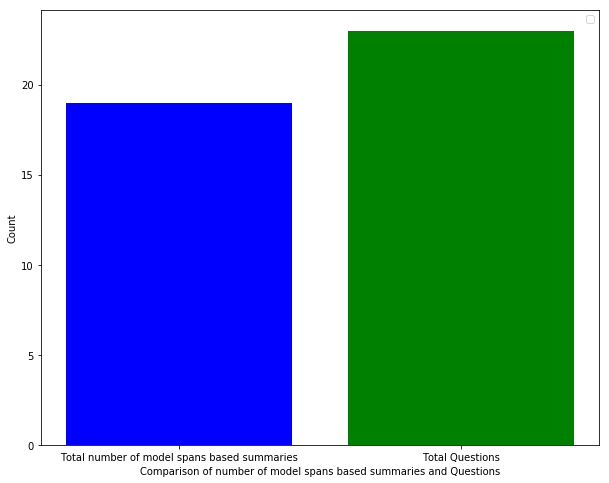

In [170]:
plt.figure(figsize=(10,8))
ticks = ['Total number of model spans based summaries', 'Total Questions']
plt.bar(np.arange(2), [len(qa_dt_v2[qa_dt_v2['Model_Sum_Answer'] != ''].index), len(qa_dt_v2['Questions'].index)], color = ['blue', 'green'])
plt.xticks(np.arange(2), ticks)
plt.xlabel('Comparison of number of model spans based summaries and Questions')
plt.ylabel('Count')
plt.legend(loc = 'Best')
plt.show()

It can be seen from above graph that the proposed model was able to generate summaries for 19 out of 23 questions.

W1122 22:54:37.663835 140627866560320 legend.py:1289] No handles with labels found to put in legend.


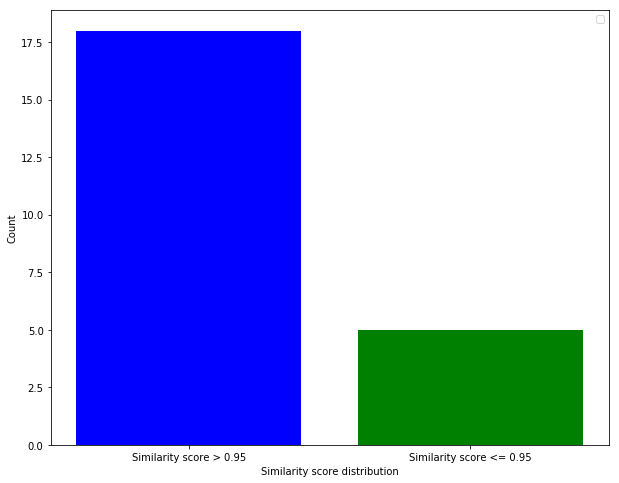

In [177]:
plt.figure(figsize=(10,8))
ticks = ['Similarity score > 0.95', 'Similarity score <= 0.95']
plt.bar(np.arange(2), [len(qa_dt_v2[qa_dt_v2['similarity_score'] > 0.95].index), len(qa_dt_v2[qa_dt_v2['similarity_score'] <= 0.95].index)], color = ['blue', 'green'])
plt.xticks(np.arange(2), ticks)
plt.xlabel('Similarity score distribution')
plt.ylabel('Count')
plt.legend(loc = 'Best')
plt.show()

It can be seem from the above plot that for 18 of the 23 questions, the similarity score between the model answer span based summaries and reference answer summaries of above 0.95 was achieved.  

In [178]:
comb_ms = (".").join(qa_dt_v2["Model_Sum_Answer"])
#len(comb_abs)
ms_words = conv_word(comb_ms)


W1122 23:31:58.122776 140627866560320 legend.py:1289] No handles with labels found to put in legend.


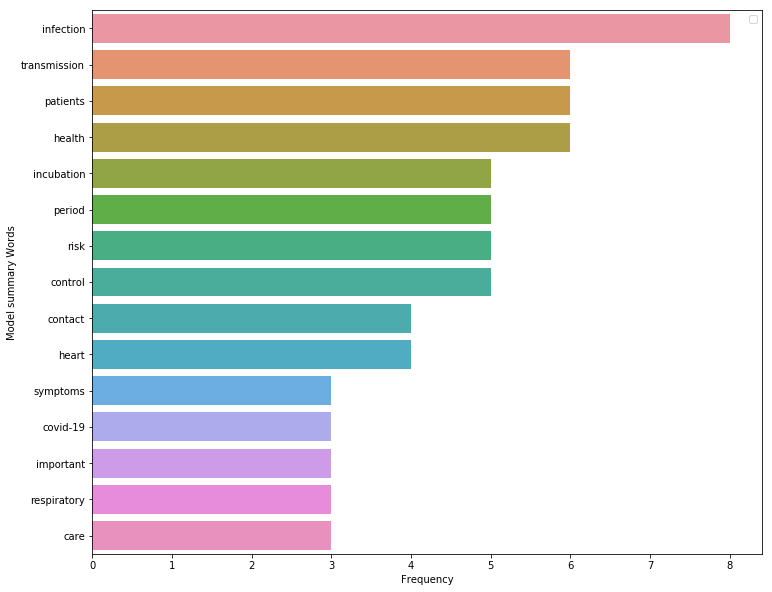

In [182]:
# Plotting 15 most commonly used words in the model answer span based summaries along with their frequency
plot_word_frequency(ms_words, 'Frequency', 'Model summary Words', 15)

The above plot shows that some of the most commonly mentioned words in the model answer span based summaries include 'infection', 'transmission', 'patients', 'health', 'incubation', 'period', 'risk', 'heart', 'covid-19'. 

In [180]:
comb_rs = (".").join(qa_dt_v2["Sum_Reference_answers"])
#len(comb_abs)
rs_words = conv_word(comb_rs)


W1122 23:33:57.266725 140627866560320 legend.py:1289] No handles with labels found to put in legend.


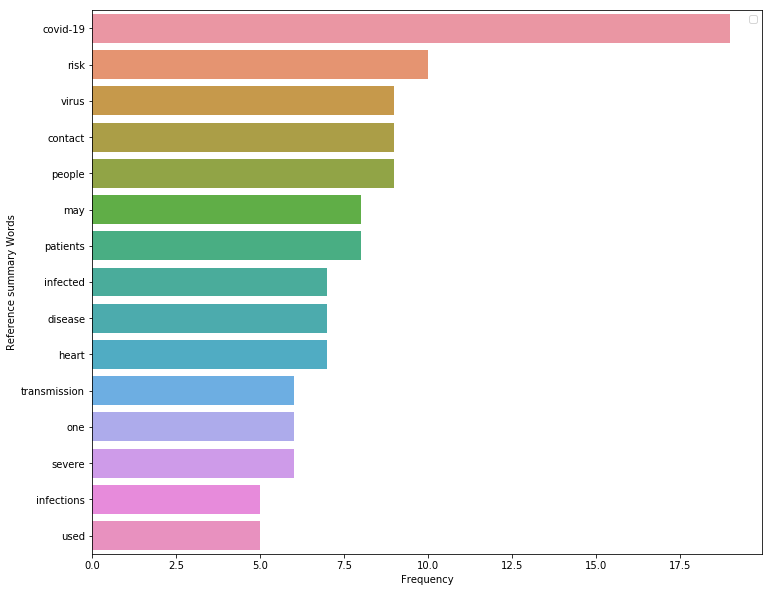

In [183]:
# Plotting 15 most commonly used words in the reference answer based summaries along with their frequency
plot_word_frequency(rs_words, 'Frequency', 'Reference summary Words', 15)

The above plot shows that some of the most commonly mentioned words in the reference answer based summaries include 'covid-19', 'risk', 'virus','infected', 'transmission', 'patients', 'heart', 'contact', 'people'.

In [98]:
qa_df = qa_dt_v2

In [99]:
for i in range(len(qa_df)):
    qa_df.loc[i, "Model_ans_length"] = int(len(abs_proc(qa_df.loc[i, "Model_Sum_Answer"])))
    qa_df.loc[i, "Sum_ref_ans_length"] = int(len(abs_proc(qa_df.loc[i, "Sum_Reference_answers"])))

In [102]:
qa_df.head()

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer,Sum_Reference_answers,similarity_score,Model_ans_length,Sum_ref_ans_length
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ? In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). There is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces.",0.977188,177.0,433.0
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted

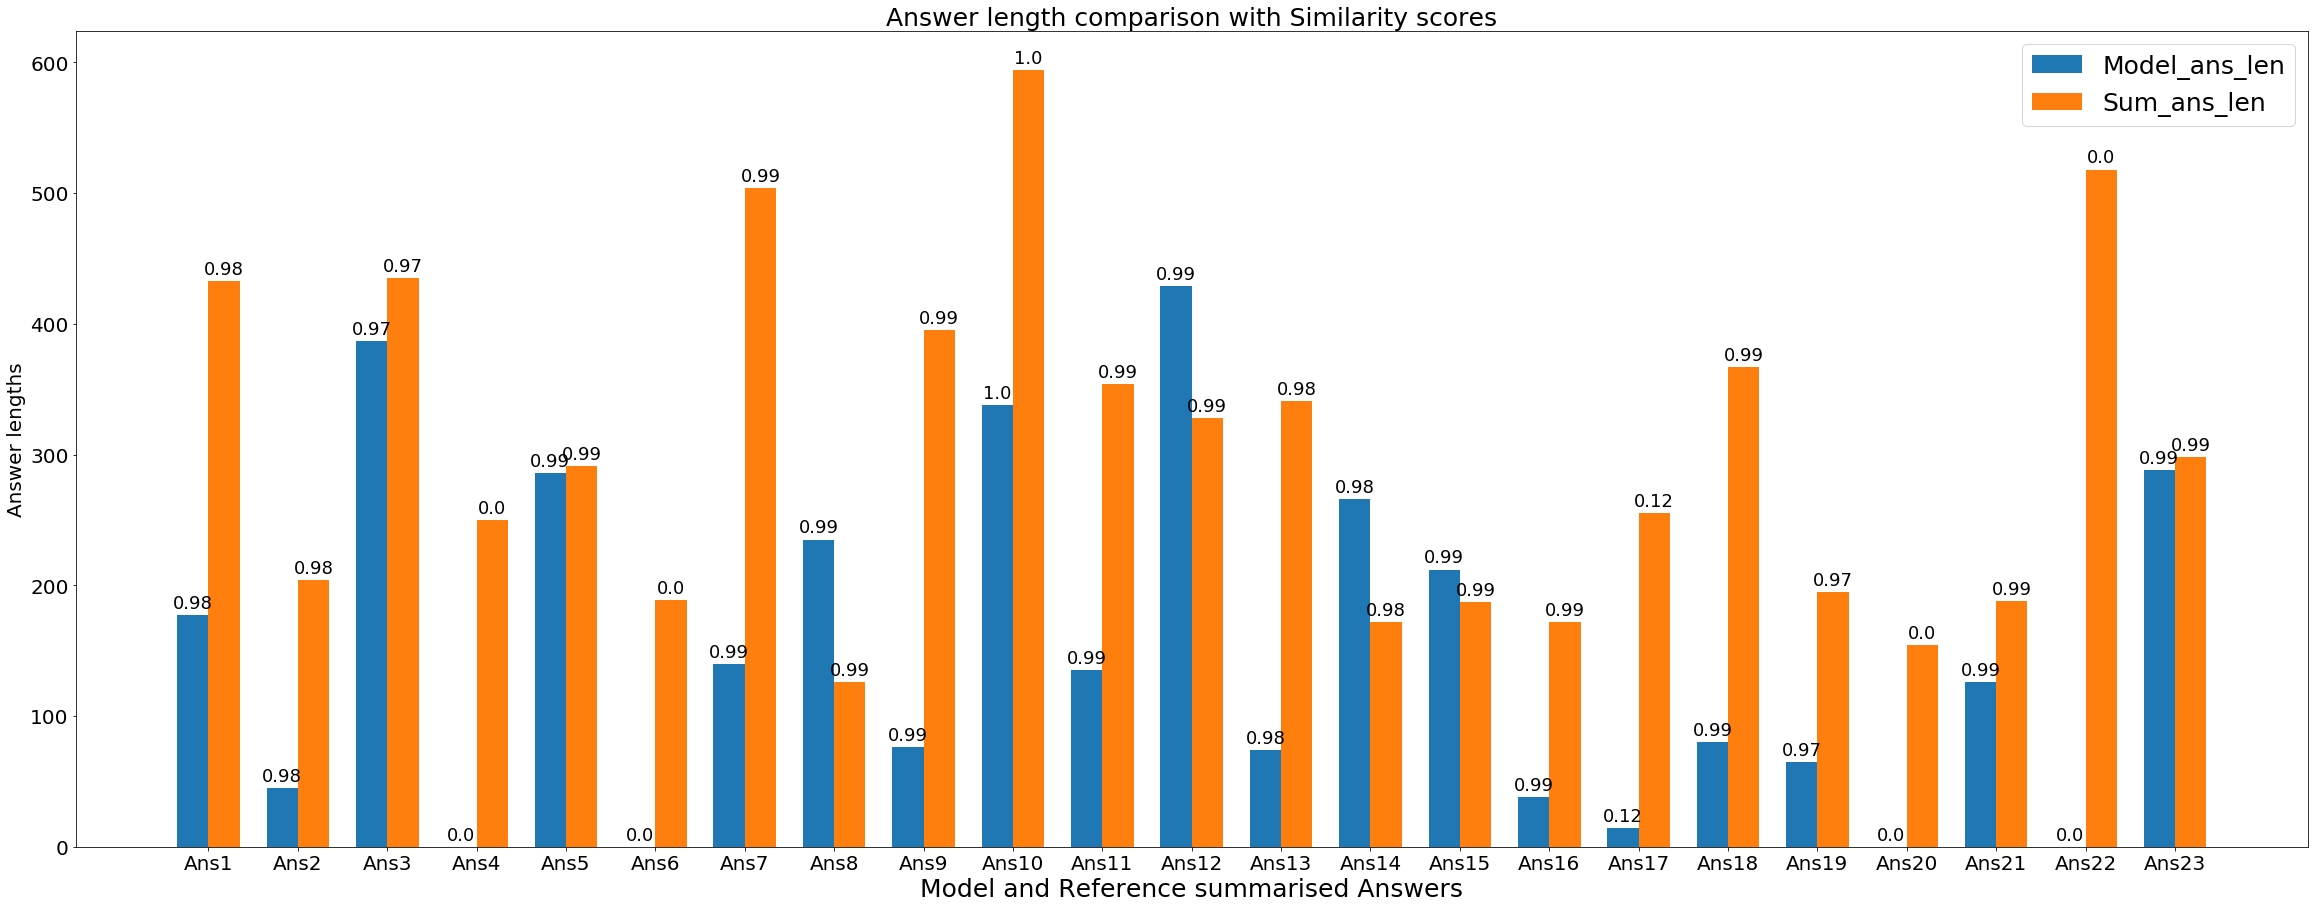

In [129]:
#plt.figure(figsize=(40,15))
index = np.arange(23)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(40,15))
#plt.figure(figsize=(40,15)
Model_ans_len = ax.bar(index, qa_df['Model_ans_length'], bar_width, label = 'Model_ans_len')
Sum_ans_len = ax.bar(index + bar_width, qa_df['Sum_ref_ans_length'], bar_width, label = 'Sum_ans_len')
ax.set_xlabel('Model and Reference summarised Answers', fontsize = 25)
ax.set_ylabel('Answer lengths', fontsize = 20)
ax.set_title('Answer length comparison with Similarity scores', fontsize = 25)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Ans1", "Ans2", "Ans3", "Ans4", "Ans5", "Ans6", "Ans7", "Ans8", "Ans9", "Ans10", "Ans11", "Ans12", "Ans13", "Ans14", "Ans15", "Ans16", "Ans17", "Ans18", "Ans19", "Ans20", "Ans21", "Ans22", "Ans23"])
ax.tick_params(labelsize=20)

ax.legend(fontsize = 25)
annotlabel(qa_df, Model_ans_len)
annotlabel(qa_df, Sum_ans_len)
plt.show()

The plot shows the sizes of the answer span based summaries, reference answer summaries and respective similarity scores.
The plot shows that size difference between the two answers does not necessarily impact the similarity scores till both answers are big enough to capture important information, making them similar symantically.
The similarity scores are '0' for all the cases where answer span based summaries are not generated and the score is low for an instance (Ans17) when the answer span based summary is too small and does not have enough information to match the reference answer summary.



## Few experiments that were conducted to test the word2vec, trained on "combined Abstract dataset", performance by running the algorithm on few instances. Code below and results were all part of experiments and analysis

In [125]:
# Model summarised answer and reference answer for same question
vs_set = []
sent1 = abs_proc(qa_dt_v2.loc[0, "Model_Sum_Answer"])
#sent1 = abs_proc("Its time to play and enjoy victory")
sent2 = abs_proc(qa_dt_v2.loc[0, "Sum_Reference_answers"])
for answer in [sent1, sent2]:
        vs = np.zeros(300)
        for word in answer:
            vs = np.add(vs, word2vec_md.wv[word]) 
        vs_set.append(vs)

In [126]:
cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))

In [127]:
cost[0][0]

0.9778376975727566

The 'cost' score is the cosine similarity score and it can be seen that high similaruty score is achieved between the two answers for first question "Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?"

In [129]:
# Random sentence and reference answer for some question
vs_set = []
#sent1 = abs_proc(qa_dt_v2.loc[0, "Model_Sum_Answer"])
sent1 = abs_proc("Its time to play and enjoy victory")
sent2 = abs_proc(qa_dt_v2.loc[0, "Sum_Reference_answers"])
for answer in [sent1, sent2]:
        vs = np.zeros(300)
        for word in answer:
            vs = np.add(vs, word2vec_md.wv[word]) 
        vs_set.append(vs)

In [130]:
cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))

In [131]:
cost[0][0]

0.9344918228162001

The 'cost' score is the cosine similarity score and it can be seen that high similarity score is still achieved between a random sentence and reference answers for first question "Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?" This shows that the proposed sentence similarity algorithm could be improved further 

Using Smooth inverse frequency technique to improve performance of word2vec model. It involves taking weighted average of word embeddings, instead of simple mean average. Every word embedding is weighted by a/(a + p(w)), where a is a parameter that is typically set to 0.001 and p(w) is the estimated frequency of the word in a corpus. This algorithm helps in giving importance to semantical similarity  

In [135]:
a = 0.001
def mp_wrd_freq(document):
    return Counter(itertools.chain(*document))

In [144]:
# Test with Smooth inverse frequency (SIF) technique  
# Model summarised answer and reference answer for same question
vs_set = []
sent1 = abs_proc(qa_dt_v2.loc[0, "Model_Sum_Answer"])
#sent1 = abs_proc("Its time to play and enjoy victory")
sent2 = abs_proc(qa_dt_v2.loc[0, "Sum_Reference_answers"])
wrd_cnt = mp_wrd_freq((sent1 + sent2))
for answer in [sent1, sent2]:
        vs = np.zeros(300)
        cont_lt = len(answer)
        for word in answer:
            a_value = a / (a + wrd_cnt[word]) #SIF factor
            vs = np.add(vs, np.multiply(a_value, word2vec_md.wv[word])) 
        vs = np.divide(vs, cont_lt)
        vs_set.append(vs)

In [145]:
cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))

In [146]:
cost[0][0]

0.09679692529760227

It can be seen that using SIF has made Word2vec model lot more aggessive in checking semantic similarity between the two answers. The difference in content length, quality in terms of gramatical correctness of sentences have considered to an extreme, resulting in a score that not necessarily depicts true variance between the two sentences.

In [141]:
# Test with Smooth inverse frequency (SIF) technique  
# Model random answer and reference answer for same question
vs_set = []
sent1 = abs_proc("Its time to play and enjoy victory")
#sent1 = abs_proc("Its time to play and enjoy victory")
sent2 = abs_proc(qa_dt_v2.loc[0, "Sum_Reference_answers"])
wrd_cnt = mp_wrd_freq((sent1 + sent2))
for answer in [sent1, sent2]:
        vs = np.zeros(300)
        cont_lt = len(answer)
        for word in answer:
            a_value = a / (a + wrd_cnt[word]) #SIF factor
            vs = np.add(vs, np.multiply(a_value, word2vec_md.wv[word])) 
        vs = np.divide(vs, cont_lt)
        vs_set.append(vs)

In [142]:
cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))

In [143]:
cost[0][0]

0.23267663430758986

The similarity score for the case wherein one content is a random sentence and the other is one of the reference answers is higher than when the model generated summary answer was compared to the reference answer to the same question, even though the content in both of them was quite similar. This showed that SIF is not ideal for the dataset being considered for this project.
Therefore, will consider the original implementation of Word2Vec only

Function for Word2Vec model output

In [158]:
def wrd2vec_cos(word2vec_md, qa_dt_v2):
    vs_set = []
    for i in range(len(qa_dt_v2)):
        sent1 = abs_proc(qa_dt_v2.loc[i, "Model_Sum_Answer"])
        sent2 = abs_proc(qa_dt_v2.loc[i, "Sum_Reference_answers"])
        for answer in [sent1, sent2]:
            vs = np.zeros(300)
            for word in answer:
                vs = np.add(vs, word2vec_md.wv[word]) 
            vs_set.append(vs)
            #print(len(vs_set))
        cost = cosine_similarity(vs_set[0].reshape(1,-1), vs_set[1].reshape(1,-1))[0][0]
        #print(cost)
        qa_dt_v2.loc[i, "similarity_score"] = cost
        vs_set = []
    return qa_dt_v2

In [159]:
qa_dt_v2 = wrd2vec_cos(word2vec_md, qa_dt_v2)

In [160]:
qa_dt_v2

,Task,Questions,Reference Answers,prp_qa,Model_Sum_Answer,Sum_Reference_answers,similarity_score
0,"What is known about transmission, incubation, and environmental stability?","Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ?m in diameter they are referred to as respiratory droplets, and when then are <5?m in diameter, they are referred to as droplet nuclei. According to current evidence, COVID-19 virus is primarily transmitted between people through respiratory droplets and contact routes. In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported.\nDroplet transmission occurs when a person is in in close contact (within 1 m) with someone who has respiratory symptoms (e.g., coughing or sneezing) and is therefore at risk of having his/her mucosae (mouth and nose) or conjunctiva (eyes) exposed to potentially infective respiratory droplets. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). \nAirborne transmission is different from droplet transmission as it refers to the presence of microbes within droplet nuclei, which are generally considered to be particles <5?m in diameter, can remain in the air for long periods of time and be transmitted to others over distances greater than 1 m. \nIn the context of COVID-19, airborne transmission may be possible in specific circumstances and settings in which procedures or support treatments that generate aerosols are performed; i.e., endotracheal intubation, bronchoscopy, open suctioning, administration of nebulized treatment, manual ventilation before intubation, turning the patient to the prone position, disconnecting the patient from the ventilator, non-invasive positive-pressure ventilation, tracheostomy, and cardiopulmonary resuscitation. \nThere is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces. However, to date only one study has cultured the COVID-19 virus from a single stool specimen. There have been no reports of faecal?oral transmission of the COVID-19 virus to date.",covid viru transmit aerosol droplet food close contact faecal matter water,"the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ? In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). There is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces.",0.977838
1,"What is known about transmission, incubation, and environmental stability?",How long is the incubation period for the virus in humans?,"An incubation period is the time between when you contract a virus and when your symptoms start.\nCurrently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure.\nAccording to a recent reportTrusted Source, more than 97 percent of people who cont

In [163]:
qa_dt_v2[["Questions","Model_Sum_Answer", "Sum_Reference_answers", "similarity_score"]]

,Questions,Model_Sum_Answer,Sum_Reference_answers,similarity_score
0,"Is the COVID virus transmitted by aerosol, droplets, food, close contact, faecal matter, or water?","the transmission modes of sars-coronavirus appear to be through droplet spread, close contact and fomites. through direct or indirect physical contact, droplets or aerosols. when transmission is via aerosols, droplets, or fomites (contaminated surfaces).","Respiratory infections can be transmitted through droplets of different sizes: when the droplet particles are >5-10 ? In an analysis of 75,465 COVID-19 cases in China, airborne transmission was not reported. Transmission may also occur through fomites in the immediate environment around the infected person.8 Therefore, transmission of the COVID-19 virus can occur by direct contact with infected people and indirect contact with surfaces in the immediate environment or with objects used on the infected person (e.g., stethoscope or thermometer). There is some evidence that COVID-19 infection may lead to intestinal infection and be present in faeces.",0.977838
1,How long is the incubation period for the virus in humans?,"is the delay from infection until onset of symptoms, and varies from person to person","An incubation period is the time between when you contract a virus and when your symptoms start. Currently, according to the Centers for Disease Control and Prevention (CDC)Trusted Source, the incubation period for the novel coronavirus is somewhere between 2 to 14 days after exposure. However, this estimate may change as we learn more about the virus.",0.980423
2,How does the incubation period in humans vary across age and health conditions?,"between shorter incubation period and greater severity in both groups after adjusting for potential confounders. conclusions : our findings suggest that patients with a shorter. the incubation period is the delay from infection until onset of symptoms, and varies from person to person. this study evaluated whether and when the infected but asymptomatic cases during the incubation period could infect others. we evaluated the potential of transmission during the incubation period in 50 infection clusters, including 124 cases. results : the estimated mean incubation period for covid-19 was 4.","The COVID-19 pandemic has shown a markedly low proportion of cases among children. As per estimate based on analysis from 'Nature Medicine' , the susceptibility to infection in individuals under 20 years of age is approximately half that of adults aged over 20 years, and that clinical symptoms manifest in 21% (95% credible interval: 12–31%) of infections in 10- to 19-year-olds, rising to 69% (57–82%) of infections in people aged over 70 years. Without effective control measures, regions with relatively older populations could see disproportionally more cases of COVID-19, particularly in the later stages of an unmitigated epidemic.",0.970849
3,Can the virus be transmitted asymptomatically or during the incubation period?,,"The new coronavirus can be transmitted by people who are infected but before their symptoms appear – pre-symptomatic carriers. There is evidence that infected people who never develop symptoms – asymptomatic carriers – can also transmit coronavirus. While pre-symptomatic carriers appear to be an important source of infection, the role of asymptomatic carriers is less clear.",0.000000
4,"How does weather, heat, and humidity affect the transmission of COVID 19?","the temperature variation and humidity may be important factors affecting the covid-19 mortality. with warm weather, we found a dose-response relationship between relative humidity and the odds for ld. heating inactivation of samples at 56 [UNK] prior to testing is considered a possible method to reduce the risk of transmission. patients with respiratory symptoms are at greater risk of covid-19 transmission","The main findings as per one of the studies related to effects of environemnt on COVID 19 are: Hot 

## Code after this is test and failed code due to technical issues

In [125]:
#Creating summary using BART summarizer
# As can be seen by below error, this BART library did not work on the Nimblebox environment
# and so had to study and consider other summarization model or BART library
#bart_sum_input_ids = sum_tokenizer.batch_encode_plus([bart_answ], return_tensors='pt', max_length=1024, truncation = True)['input_ids'].to(torch_device)
#print(bart_sum_input_ids.shape)
#bart_sum_input_ids_lt = bart_sum_input_ids[0].tolist()
#sum_ids = sum_model.generate(bart_sum_input_ids,
                                               #num_beams=4,
                                               #length_penalty=1.2,
                                               #max_length=5,
                                               #early_stopping=True)
                                               #no_repeat_ngram_size=4)
#print(sum_ids)
#bart_sum = sum_tokenizer.decode(sum_ids.squeeze(), skip_special_tokens=True)

torch.Size([1, 168])


RuntimeError: bool value of Tensor with more than one value is ambiguous

In [12]:
# Error generating test code for BART model not working
#ARTICLE_TO_SUMMARIZE = "My friends are cool but they eat too many carbs."
#bart_sum_input_ids = sum_tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors='pt')['input_ids']
#print(bart_sum_input_ids)
# Generate Summary
#summary_ids = sum_model.generate(bart_sum_input_ids, num_beams=4, max_length=5, early_stopping=True)
#bart_sum = sum_tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


tensor([[    0,  2387,   964,    32,  3035,    53,    51,  3529,   350,   171,
         33237,     4,     2]])


RuntimeError: bool value of Tensor with more than one value is ambiguous

In [127]:
from platform import python_version
print(python_version())

3.7.3


In [128]:
import tensorflow as tf

In [129]:
tf.__version__ 

'2.2.0'